#**Library**

In [7]:
pip install "git+https://github.com/FelSiq/DBCV"


  Cloning https://github.com/FelSiq/DBCV to /tmp/pip-req-build-acsgvkmf
  Running command git clone --filter=blob:none --quiet https://github.com/FelSiq/DBCV /tmp/pip-req-build-acsgvkmf
  Resolved https://github.com/FelSiq/DBCV to commit 69d930f337b526985af84b1fb83a880b794e38c6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for dbcv: filename=dbcv-0.1.0-py3-none-any.whl size=6505 sha256=19df58b73d51a061647976968dff1ef09fc59f45ece93df76aca97c05378a612
  Stored in directory: /tmp/pip-ephem-wheel-cache-wbs6n4ll/wheels/db/29/5c/22f8798fd788b7f37312b81a63fab3aa43bea8270f453fbe8c
Successfully built dbcv


In [8]:
from dbcv import dbcv

In [9]:
pip install "git+https://github.com/christopherjenness/DBCV"

  Cloning https://github.com/christopherjenness/DBCV to /tmp/pip-req-build-b59ar092
  Running command git clone --filter=blob:none --quiet https://github.com/christopherjenness/DBCV /tmp/pip-req-build-b59ar092
  Resolved https://github.com/christopherjenness/DBCV to commit db7345c45ab7d33ea500778e5c9048fd9f7d3156
  Preparing metadata (setup.py) ... done
  Created wheel for DBCV: filename=DBCV-0.0.0-py3-none-any.whl size=4186 sha256=0198faf5d7224fe62c2b9b9d997b3631ad6c0dd104b32048f3b9af7f7bde5608
  Stored in directory: /tmp/pip-ephem-wheel-cache-nhnoka3i/wheels/f7/06/e3/54e0af644dd9ff7b28d7ab4f6f628804ee3c0a86c8f835c749
Successfully built DBCV
  Attempting uninstall: DBCV
    Found existing installation: dbcv 0.1.0
    Uninstalling dbcv-0.1.0:
      Successfully uninstalled dbcv-0.1.0


In [10]:
pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 31.2 MB/s eta 0:00:00


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
import hdbscan
from hdbscan import HDBSCAN
import time
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from DBCV import DBCV
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score,adjusted_rand_score , davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN
from sklearn.utils import resample
from scipy.stats import entropy
import math
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from sklearn.utils import resample
import scipy.io
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import MeanShift, estimate_bandwidth
from scipy.special import erf
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)



a.spagnolo9@campus.unimib.ii

#**Function**

In [12]:
def optimalK(data, maxClusters):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarray of shape (n_samples, n_features)
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    nrefs = 3
    gaps = np.zeros((len(range(1, maxClusters)),))
    results = []

    for gap_index, k in enumerate(range(1, maxClusters)):

        refDisps = np.zeros(nrefs)

        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            km = KMeans(n_clusters=k)
            km.fit(randomReference)

            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(n_clusters=k)
        km.fit(data)

        origDisp = km.inertia_

        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        gaps[gap_index] = gap
        results.append({'clusterCount': k, 'gap': gap})
    resultsdf = pd.DataFrame(results)
    return gaps.argmax() + 1, resultsdf

In [13]:
def generate_moon_datasets(seed):
    datasets = []

    for noise in [0.0, 0.056, 0.111, 0.167, 0.222, 0.278, 0.333, 0.389, 0.444, 0.5]:
        X, _ = make_moons(n_samples=1000, noise=noise, random_state=seed)
        datasets.append(X)

    return datasets

In [14]:
def plot_datasets(datasets):
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))

    for i, dataset in enumerate(datasets):
        row = i // 5
        col = i % 5
        ax = axes[row, col]
        ax.scatter(dataset[:, 0], dataset[:, 1], c='black', s=1)
        ax.set_title(f'Dataset {i+1}')
        ax.set_xlim(-1.5, 2.5)
        ax.set_ylim(-1.0, 1.5)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [15]:
def plot_best_results_compare(datasets, results, best_params):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    min_samples, epsilon = best_params

    for i, (X, dataset_results) in enumerate(zip(datasets, results)):
        print(dataset_results)
        for min_samples_, epsilon_, dbcv_score, silhouette, dunn_index, davies_bouldin, calinski_harabasz,shannon_entropy, labels in dataset_results:
            if (min_samples_, epsilon_) == best_params:
                ax = axs[i // 5, i % 5]
                ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
                ax.set_title(f'min_samples={min_samples}, epsilon={epsilon}\ndbcv={dbcv_score:.3f}\nsilhouette={silhouette:.3f}\ndunn={dunn_index:.3f}\ndavies={davies_bouldin:.3f}\ncalinski={calinski_harabasz:.3f}\nshannon_entropy={shannon_entropy:.3f}')
                ax.set_xticks([])
                ax.set_yticks([])
                break

    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [16]:
#Se non funziona usare funzione precedente
def calculate_dunn_index(X, labels):

    X = np.array(X) if not isinstance(X, np.ndarray) else X
    unique_labels = np.unique(labels)
    if len(unique_labels) < 2:
        return -1

    distances = np.sqrt(((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2).sum(axis=2))
    min_intercluster_distances = np.inf
    for label_i in unique_labels:
        cluster_i = X[labels == label_i]
        for label_j in unique_labels:
            if label_i != label_j:
                cluster_j = X[labels == label_j]
                intercluster_distances = np.min(distances[np.ix_(labels == label_i, labels == label_j)])
                min_intercluster_distances = min(min_intercluster_distances, intercluster_distances)
    max_intracluster_distances = 0
    for label in unique_labels:
        cluster = X[labels == label]
        intracluster_distances = np.max(distances[np.ix_(labels == label, labels == label)])
        max_intracluster_distances = max(max_intracluster_distances, intracluster_distances)
    return min_intercluster_distances / max_intracluster_distances



In [17]:
def analyze_datasets(datasets):
    results = []
    param_grid = {
        'min_samples': [10],
        'epsilon': [0.1]
    }

    for X in datasets:
        dataset_results = []
        for min_samples in param_grid['min_samples']:
            for epsilon in param_grid['epsilon']:
                clusterer = DBSCAN(min_samples=min_samples, eps=epsilon)
                #clusterer = hdbscan.HDBSCAN(min_samples = min_samples, cluster_selection_epsilon=epsilon)
                labels = clusterer.fit_predict(X)

                dbcv_score = dbcv(X, labels)
                silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
                dunn_index = calculate_dunn_index(X, labels)
                davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else -1
                calinski_harabasz = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else -1
                shannon_entropy = calculate_shannon_entropy(labels)
                dataset_results.append((min_samples, epsilon, dbcv_score, silhouette, dunn_index,
                                        davies_bouldin, calinski_harabasz, shannon_entropy, labels))

        results.append(dataset_results)

    return results

In [18]:
def analyze_datasets_best_params(datasets):
    results = []
    param_grid = {
        'min_samples': [1, 5, 10, 50],
        'epsilon': [0.01, 0.1, 0.2, 0.5]
    }

    for X in datasets:
        dataset_results = []

        for min_samples in param_grid['min_samples']:
            for epsilon in param_grid['epsilon']:
                clusterer = DBSCAN(min_samples=min_samples, eps=epsilon)
                labels = clusterer.fit_predict(X)
                dbcv_score = dbcv(X, labels)
                dataset_results.append((min_samples, epsilon, dbcv_score,labels))

        results.append(dataset_results)

    return results

In [19]:
def find_best_params(results):
    param_dbvcs = {}

    for dataset_results in results:
        for min_samples, epsilon, dbcv_score, labels in dataset_results:
            param_key = (min_samples, epsilon)
            if param_key not in param_dbvcs:
                param_dbvcs[param_key] = []
            param_dbvcs[param_key].append(dbcv_score)

    param_avg_dbcv = {k: np.mean(v) for k, v in param_dbvcs.items()}

    best_params = max(param_avg_dbcv, key=param_avg_dbcv.get)

    return best_params

In [20]:
import matplotlib.pyplot as plt

def plot_best_results(datasets, results, best_params):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))
    min_samples, epsilon = best_params
    min_samples = 2
    epsilon = 0.1

    for i, (X, dataset_results) in enumerate(zip(datasets, results)):
        for min_samples_, epsilon_, dbcv_score, labels in dataset_results:
            if (min_samples_, epsilon_) == best_params:
                ax = axs[i // 5, i % 5]
                ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
                if dbcv_score is not None:
                    ax.set_title(f'min_samples={min_samples}, epsilon={epsilon}\ndbcv={dbcv_score:.3f}')
                else:
                    ax.set_title(f'min_samples={min_samples}, epsilon={epsilon}\ndbcv=N/A')
                ax.set_xticks([])
                ax.set_yticks([])
                break

    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [21]:
def calculate_shannon_entropy(labels):
    labels = np.array(labels) if not isinstance(labels, np.ndarray) else labels
    unique, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    # labels = labels + 1
    # entropy_val = entropy(np.bincount(labels) / len(labels), base=2)
    # entropy_val = abs(1-entropy_val)
    return entropy

In [22]:
def plot_datasets_with_clustering(datasets):
    fig, axes = plt.subplots(10, 3, figsize=(18, 30))
    dbcv_total = []
    dunn_total = []
    davies_total = []
    calinski_total = []
    entropy_total = []
    silhouette_total = []
    gap_total = []

    for i, dataset in enumerate(datasets):
        X = dataset

        ax_left = axes[i, 0]
        ax_left.scatter(X[:, 0], X[:, 1], c='black', s=10)
        ax_left.set_title(f'Dataset {i+1} - Original')
        ax_left.set_xlim(-1.5, 2.5)
        ax_left.set_ylim(-1.0, 1.5)
        ax_left.grid(True, color='lightgrey', linewidth=0.5)

        ax_middle = axes[i, 1]
        clusterer = DBSCAN(min_samples=10, eps=0.1)
        labels = clusterer.fit_predict(X)

        scatter = ax_middle.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
        ax_middle.set_title(f'Dataset {i+1} - DBSCAN')
        ax_middle.set_xlim(-1.5, 2.5)
        ax_middle.set_ylim(-1.0, 1.5)
        ax_middle.grid(True, color='lightgrey', linewidth=0.5)

        dbcv_score = dbcv(X, labels)
        dbcv_total.append(dbcv_score)
        silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        silhouette_total.append(silhouette)
        dunn_index = calculate_dunn_index(X, labels)
        dunn_total.append(dunn_index)
        davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else -1
        davies_bouldin_norm = 1 / davies_bouldin if davies_bouldin > 0 else -1
        davies_total.append(davies_bouldin_norm)

        calinski_harabasz = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else -1
        calinski_total.append(calinski_harabasz)

        # Calcolo entropia e normalizzazione
        num_clusters = len(set(labels))
        entropy = calculate_shannon_entropy(labels)
        shannon_entropy_norm = abs(np.log2(num_clusters) - entropy) if num_clusters > 1 else -1
        entropy_total.append(shannon_entropy_norm)
        n_clusters,gap_df = optimalK(X, 20)
        optimal_gap_statistic = gap_df.loc[gap_df.gap.idxmax(), 'gap']
        gap_total.append(optimal_gap_statistic)


        ax_right = axes[i, 2]
        ax_right.axis('off')

        metrics_text = (f'DBCV: {round(float(dbcv_score),4)}\n'
                        f'Silhouette: {round(float(silhouette),4)}\n'
                        f'Dunn Index: {round(float(dunn_index),4)}\n'
                        f'Davies-Bouldin (Rec): {round(float(davies_bouldin_norm),4)}\n'
                        f'Calinski-Harabasz: {round(float(calinski_harabasz),4)}\n'
                        f'Entropy (Norm): {round(float(shannon_entropy_norm),4)}\n'
                        f'Gap Statistic: {round(float(optimal_gap_statistic),4)}\n'
                        f'Number of clusters: {len(set(labels))}')

        ax_right.text(0.1, 0.5, metrics_text, fontsize=10, verticalalignment='center',
                      bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()
    return dbcv_total, dunn_total, davies_total, calinski_total, entropy_total, silhouette_total,gap_total


In [23]:
def generate_circle_data(n_points, radius, shift):
    t = np.linspace(0, 2 * np.pi, n_points)
    x = radius * np.cos(t) + shift[0]
    y = radius * np.sin(t) + shift[1]
    return np.column_stack((x, y))

In [24]:
def generate_datasets_with_two_circles(n_datasets, n_points_per_circle, n_points_per_circle_inner, inner_radius, outer_radius, initial_shift, shift_increment):
    datasets = []
    for i in range(n_datasets):
        outer_circle = generate_circle_data(n_points_per_circle, outer_radius, (0, 0))

        shift = (initial_shift[0] + i * shift_increment[0], initial_shift[1] + i * shift_increment[1])
        inner_circle = generate_circle_data(n_points_per_circle_inner, inner_radius, shift)

        dataset = np.concatenate([outer_circle, inner_circle])
        datasets.append(dataset)
    return datasets


In [25]:
def plot_datasets_with_clustering_circle(datasets):
    fig, axes = plt.subplots(10, 3, figsize=(30, 50))
    dbcv_total = []
    dunn_total = []
    davies_total = []
    calinski_total = []
    entropy_total = []
    silhouette_total = []
    gap_total = []

    for i, dataset in enumerate(datasets):
        X = np.unique(dataset, axis=0)

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

        ax_left = axes[i, 0]
        ax_left.scatter(X[:, 0], X[:, 1], c='black', s=10)
        ax_left.set_title(f'Dataset {i+1} - Original')
        ax_left.set_xlim(x_min, x_max)
        ax_left.set_ylim(y_min, y_max)
        ax_left.set_aspect('equal')
        ax_left.grid(True, color='lightgrey', linewidth=0.5)  # Griglia chiara e sottile

        ax_middle = axes[i, 1]
        clusterer = DBSCAN(eps=0.1, min_samples=20)
        labels = clusterer.fit_predict(X)

        scatter = ax_middle.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
        ax_middle.set_title(f'Dataset {i+1} - DBSCAN')
        ax_middle.set_xlim(x_min, x_max)
        ax_middle.set_ylim(y_min, y_max)
        ax_middle.set_aspect('equal')
        ax_middle.grid(True, color='lightgrey', linewidth=0.5)  # Griglia chiara e sottile

        try:
            dbcv_score = dbcv(X, labels)
        except ValueError:
            dbcv_score = DBCV(X, labels)
        dbcv_total.append(dbcv_score)

        silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        silhouette_total.append(silhouette)
        dunn_index = calculate_dunn_index(X, labels)
        dunn_total.append(dunn_index)

        davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else -1
        davies_bouldin_norm = 1 / davies_bouldin if davies_bouldin > 0 else -1
        davies_total.append(davies_bouldin_norm)

        calinski_harabasz = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else -1
        calinski_total.append(calinski_harabasz)

        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        entropy = calculate_shannon_entropy(labels)
        shannon_entropy_norm = abs(np.log2(num_clusters) - entropy) if num_clusters > 1 else -1
        entropy_total.append(shannon_entropy_norm)

        n_clusters,gap_df = optimalK(X, 20)
        optimal_gap_statistic = gap_df.loc[gap_df.gap.idxmax(), 'gap']
        gap_total.append(optimal_gap_statistic)

        ax_right = axes[i, 2]
        ax_right.axis('off')

        metrics_text = (f'DBCV: {round(float(dbcv_score),4)}\n'
                        f'Silhouette: {round(float(silhouette),4)}\n'
                        f'Dunn Index: {round(float(dunn_index),4)}\n'
                        f'Davies-Bouldin (Rec): {round(float(davies_bouldin_norm),4)}\n'
                        f'Calinski-Harabasz: {round(float(calinski_harabasz),4)}\n'
                        f'Entropy (Norm): {round(float(shannon_entropy_norm),4)}\n'
                        f'Gap Statistic: {round(float(optimal_gap_statistic),4)}\n'
                        f'Number of clusters: {len(set(labels))}')

        ax_right.text(0.1, 0.5, metrics_text, fontsize=10, verticalalignment='center',
                      bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()
    return dbcv_total, dunn_total, davies_total, calinski_total, entropy_total, silhouette_total, gap_total


In [26]:
def generate_noisy_circles(n_datasets, n_samples, noise_increment, seed):
    datasets = []
    for i in range(n_datasets):
        noise_level = 0.05 + i * noise_increment
        noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=noise_level, random_state=seed)
        datasets.append(noisy_circles[0])
    return datasets

In [27]:
def plot_datasets_with_clustering_noisy_circles(datasets):
    fig, axes = plt.subplots(10, 3, figsize=(30, 50))
    dbcv_total = []
    dunn_total = []
    davies_total = []
    calinski_total = []
    entropy_total = []
    silhouette_total = []
    gap_total = []

    for i, dataset in enumerate(datasets):
        X = np.unique(dataset, axis=0)

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

        ax_left = axes[i, 0]
        ax_left.scatter(X[:, 0], X[:, 1], c='black', s=10)
        ax_left.set_title(f'Dataset {i+1} - Original')
        ax_left.set_xlim(x_min, x_max)
        ax_left.set_ylim(y_min, y_max)
        ax_left.set_aspect('equal')
        ax_left.grid(True, color='lightgrey', linewidth=0.5)

        ax_middle = axes[i, 1]
        clusterer = DBSCAN(eps=0.1, min_samples=10)
        labels = clusterer.fit_predict(X)

        scatter = ax_middle.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
        ax_middle.set_title(f'Dataset {i+1} - DBSCAN')
        ax_middle.set_xlim(x_min, x_max)
        ax_middle.set_ylim(y_min, y_max)
        ax_middle.set_aspect('equal')
        ax_middle.grid(True, color='lightgrey', linewidth=0.5)

        try:
            dbcv_score = dbcv(X, labels)
        except ValueError:
            dbcv_score = DBCV(X, labels)
        dbcv_total.append(dbcv_score)

        silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        silhouette_total.append(silhouette)

        dunn_index = calculate_dunn_index(X, labels)
        dunn_total.append(dunn_index)

        davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else -1
        davies_bouldin_norm = 1 / davies_bouldin if davies_bouldin > 0 else -1
        davies_total.append(davies_bouldin_norm)

        calinski_harabasz = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else -1
        calinski_total.append(calinski_harabasz)

        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        entropy = calculate_shannon_entropy(labels)
        shannon_entropy_norm = abs(np.log2(num_clusters) - entropy) if num_clusters > 1 else -1
        entropy_total.append(shannon_entropy_norm)

        n_clusters,gap_df = optimalK(X, 20)
        optimal_gap_statistic = gap_df.loc[gap_df.gap.idxmax(), 'gap']
        gap_total.append(optimal_gap_statistic)

        ax_right = axes[i, 2]
        ax_right.axis('off')

        metrics_text = (f'DBCV: {round(float(dbcv_score), 4)}\n'
                        f'Silhouette: {round(float(silhouette), 4)}\n'
                        f'Dunn Index: {round(float(dunn_index), 4)}\n'
                        f'Davies-Bouldin (Rec): {round(float(davies_bouldin_norm), 4)}\n'
                        f'Calinski-Harabasz: {round(float(calinski_harabasz), 4)}\n'
                        f'Entropy (Norm): {round(float(shannon_entropy_norm), 4)}\n'
                        f'Gap Statistic: {round(float(optimal_gap_statistic),4)}\n'
                        f'Number of clusters: {len(set(labels))}')

        ax_right.text(0.1, 0.5, metrics_text, fontsize=10, verticalalignment='center',
                      bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()
    return dbcv_total, dunn_total, davies_total, calinski_total, entropy_total, silhouette_total, gap_total


In [28]:
def generate_augmented_datasets(seed):
    datasets = []
    noise_levels = [0.0, 0.056, 0.111, 0.167, 0.222, 0.278, 0.333, 0.389, 0.444, 0.5]

    for noise in noise_levels:
        np.random.seed(seed)
        num_new_points = 400
        new_points = normalized_points[np.random.choice(normalized_points.shape[0], num_new_points)]
        noisy_new_points = new_points + np.random.normal(0, noise, (num_new_points, 2))

        noisy_new_points = noisy_new_points % 1

        augmented_data = np.vstack((normalized_points, noisy_new_points))
        datasets.append(augmented_data)

    return datasets


In [29]:
def analyze_datasets_tulipan(datasets):
    results = []
    for X in datasets:
        dataset_results = []
        min_samples, epsilon = 35, 0.1
        clusterer = DBSCAN(min_samples=min_samples, eps=epsilon)
        labels = clusterer.fit_predict(X)

        dbcv_score = DBCV(X, labels)
        silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        dunn_index = calculate_dunn_index(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else -1
        davies_bouldin = 1 / davies_bouldin if davies_bouldin > 0 else -1
        calinski_harabasz = calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else -1
        num_clusters = len(set(labels))
        entropy = calculate_shannon_entropy(labels)
        shannon_entropy = abs(np.log2(num_clusters) - entropy) if num_clusters > 1 else -1
        n_clusters,gap_df = optimalK(X, 20)
        optimal_gap_statistic = gap_df.loc[gap_df.gap.idxmax(), 'gap']


        dataset_results.append((dbcv_score, silhouette, dunn_index, davies_bouldin, calinski_harabasz, shannon_entropy, optimal_gap_statistic, labels))
        results.append(dataset_results)

    return results

In [30]:
def plot_datasets_with_clustering_tulipan(datasets, results):
    fig, axes = plt.subplots(10, 3, figsize=(18, 30))
    dbcv_total, dunn_total, davies_total, calinski_total, entropy_total, silhouette_total,gap_total = [], [], [], [], [], [], []

    for i, (dataset, metrics) in enumerate(zip(datasets, results)):
        X = dataset
        dbcv_score, silhouette, dunn_index, davies_bouldin, calinski_harabasz, shannon_entropy, optimal_gap_statistic, labels = metrics[0]
        ax_left = axes[i, 0]
        ax_left.scatter(X[:, 0], X[:, 1], c='black', s=10)
        ax_left.set_title(f'Dataset {i+1} - Original')
        ax_left.set_xlim(-0.1, 1.1)
        ax_left.set_ylim(-0.1, 1.1)
        ax_left.grid(True, color='lightgrey', linewidth=0.5)

        ax_middle = axes[i, 1]
        ax_middle.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=5)
        ax_middle.set_title(f'Dataset {i+1} - DBSCAN')
        ax_middle.set_xlim(-0.1, 1.1)
        ax_middle.set_ylim(-0.1, 1.1)
        ax_middle.grid(True, color='lightgrey', linewidth=0.5)

        ax_right = axes[i, 2]
        ax_right.axis('off')
        metrics_text = (f'DBCV: {round(dbcv_score, 4)}\n'
                        f'Silhouette: {round(silhouette, 4)}\n'
                        f'Dunn Index: {round(dunn_index, 4)}\n'
                        f'Davies-Bouldin (Rec): {round(1 / davies_bouldin if davies_bouldin > 0 else -1, 4)}\n'
                        f'Calinski-Harabasz: {round(calinski_harabasz, 4)}\n'
                        f'Entropy (Norm): {round(shannon_entropy, 4)}\n'
                        f'Gap Statistic: {round(float(optimal_gap_statistic),4)}\n'
                        f'Number of clusters: {len(set(labels))}')
        ax_right.text(0.1, 0.5, metrics_text, fontsize=10, verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))

        dbcv_total.append(dbcv_score)
        silhouette_total.append(silhouette)
        dunn_total.append(dunn_index)
        davies_total.append(1 / davies_bouldin if davies_bouldin > 0 else -1)
        calinski_total.append(calinski_harabasz)
        entropy_total.append(shannon_entropy)
        gap_total.append(optimal_gap_statistic)

    plt.tight_layout()
    plt.show()
    return dbcv_total, dunn_total, davies_total, calinski_total, entropy_total, silhouette_total, gap_total


In [151]:
def best_params_hdbscan(df):
  min_cluster_sizes = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15]
  cluster_selection_epsilons = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5]

  best_dbcv_score = -1
  best_params = None
  best_labels = None

  for min_cluster_size in min_cluster_sizes:
    for epsilon in cluster_selection_epsilons:

        hdbscan_val = HDBSCAN(min_cluster_size=min_cluster_size,
                             cluster_selection_epsilon=epsilon)

        labels = hdbscan_val.fit_predict(df)

        if len(set(labels)) > 1:
            dbcv_score = dbcv(df, labels)

            if dbcv_score > best_dbcv_score:
                best_dbcv_score = dbcv_score
                best_params = (min_cluster_size, epsilon)
                best_labels = labels


  print(f"min_cluster_size: {best_params[0]}, cluster_selection_epsilon: {best_params[1]}")

  return best_params[0],best_params[1]

In [150]:
def best_params_dbscan(df):
  min_cluster_sizes = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15]
  cluster_selection_epsilons = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.5]

  best_dbcv_score = -1
  best_params = None
  best_labels = None

  for min_cluster_size in min_cluster_sizes:
    for epsilon in cluster_selection_epsilons:

        dbscan_pca = DBSCAN(min_samples=min_cluster_size,
                             eps=epsilon)

        labels = dbscan_pca.fit_predict(df)

        if len(set(labels)) > 1:
            dbcv_score = dbcv(df, labels)

            if dbcv_score > best_dbcv_score:
                best_dbcv_score = dbcv_score
                best_params = (min_cluster_size, epsilon)
                best_labels = labels

  print(f"min_cluster_size: {best_params[0]}, cluster_selection_epsilon: {best_params[1]}")
  return best_params[0], best_params[1]

In [33]:
def best_params_mean_shift(df):
  bandwidth_estimate = estimate_bandwidth(df, quantile=0.2, n_samples=500)
  bandwidth_range = np.linspace(bandwidth_estimate * 0.1, bandwidth_estimate * 1.9, 10)
  best_bandwidth = None
  best_score = -np.inf

  for bandwidth in bandwidth_range:
    ms = MeanShift(bandwidth=bandwidth)
    labels = ms.fit_predict(df)

    if len(set(labels)) > 1:
        try:

            dbcv_score = dbcv(df, labels)
            if dbcv_score > best_score:
                best_score = dbcv_score
                best_bandwidth = bandwidth
        except ValueError as e:
            print(f"Errore calcolando DBCV per banda {round(bandwidth,3)}: {e}")
    else:
        print(f"Banda {bandwidth} genera solo un cluster. Ignorato.")

  print(f"Best bandwidth: {round(best_bandwidth,3)}")
  return best_bandwidth

In [34]:
def similar_cluster(df):
  valori_unici_ms = df["Mean_shift_pred"].unique()
  valori_unici_db = df["DBSCAN_pred"].unique()
  valori_unici_hdb = df["HDBSCAN_pred"].unique()
  print(valori_unici_ms)
  print(valori_unici_db)
  print(valori_unici_hdb)

  mean_shift_labels = valori_unici_ms
  dbscan_labels = valori_unici_db
  hdbscan_labels = valori_unici_hdb
  total_rows = len(df)

  result = []

  for mean_label in mean_shift_labels:
    for dbscan_label in dbscan_labels:
        for hdbscan_label in hdbscan_labels:

            mask = (df['Mean_shift_pred'] == mean_label) & \
                   (df['DBSCAN_pred'] == dbscan_label) & \
                   (df['HDBSCAN_pred'] == hdbscan_label)
            count = mask.sum()
            percentage = (count / total_rows) * 100
            result.append({
                'Mean_shift': mean_label,
                'DBSCAN': dbscan_label,
                'HDBSCAN': hdbscan_label,
                'Percentuale': percentage
            })
  result_df = pd.DataFrame(result)
  result_df = result_df.sort_values(by='Percentuale', ascending=False)
  return result_df
# MAssimo X abbinamenti perche cluster con meno label ha solo X cluster, quindi sicuramente non ci possono
# essere piu abbinamenti di X abbinamenti di cluster corretti. Sono stati selezionati quelli che hanno
# fornito una percentuale maggiore escludendo cluster gia selezionati


In [35]:
def compute_ari(df):
  ariAbs1 = abs(adjusted_rand_score(neuroblastoma_scaled["DBSCAN_pred"], neuroblastoma_scaled["HDBSCAN_pred"]))
  ariAbs2 = abs(adjusted_rand_score(neuroblastoma_scaled["HDBSCAN_pred"], neuroblastoma_scaled["Mean_shift_pred"]))
  ariAbs3 = abs(adjusted_rand_score(neuroblastoma_scaled["Mean_shift_pred"], neuroblastoma_scaled["DBSCAN_pred"]))

  ariAbsAverage = (ariAbs1 + ariAbs2 + ariAbs3) / 3
  return ariAbsAverage

In [36]:
def compute_metrics(X, labels):
  dbcv_score = round((dbcv(X, labels)),2)
  silhouette = round((silhouette_score(X, labels) if len(set(labels)) > 1 else -1),2)
  dunn_index = calculate_dunn_index(X, labels)
  davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else -1
  davies_bouldin_norm = round((1 / davies_bouldin if davies_bouldin > 0 else -1),2)
  calinski_harabasz = round((calinski_harabasz_score(X, labels) if len(set(labels)) > 1 else -1),2)
  num_clusters = len(set(labels))
  entropy = calculate_shannon_entropy(labels)
  shannon_entropy_norm = round((abs(np.log2(num_clusters) - entropy) if num_clusters > 1 else -1),2)
  n_clusters,gap_df = optimalK(X, 20)
  optimal_gap_statistic = round((gap_df.loc[gap_df.gap.idxmax(), 'gap']),2)

  return dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic

#**Find Best Params**

In [ ]:
# start_time = time.time()
# datasets = generate_moon_datasets()
# results = analyze_datasets_best_params(datasets)
# best_params = find_best_params(results)
# plot_best_results(datasets, results, best_params)
# end_time = time.time()

# print(f"Tempo totale di esecuzione: {end_time - start_time:.2f} secondi")


#**Artificial Dataset**

**Moons**

Eseguito su 1000 campioni con fastdbcv.

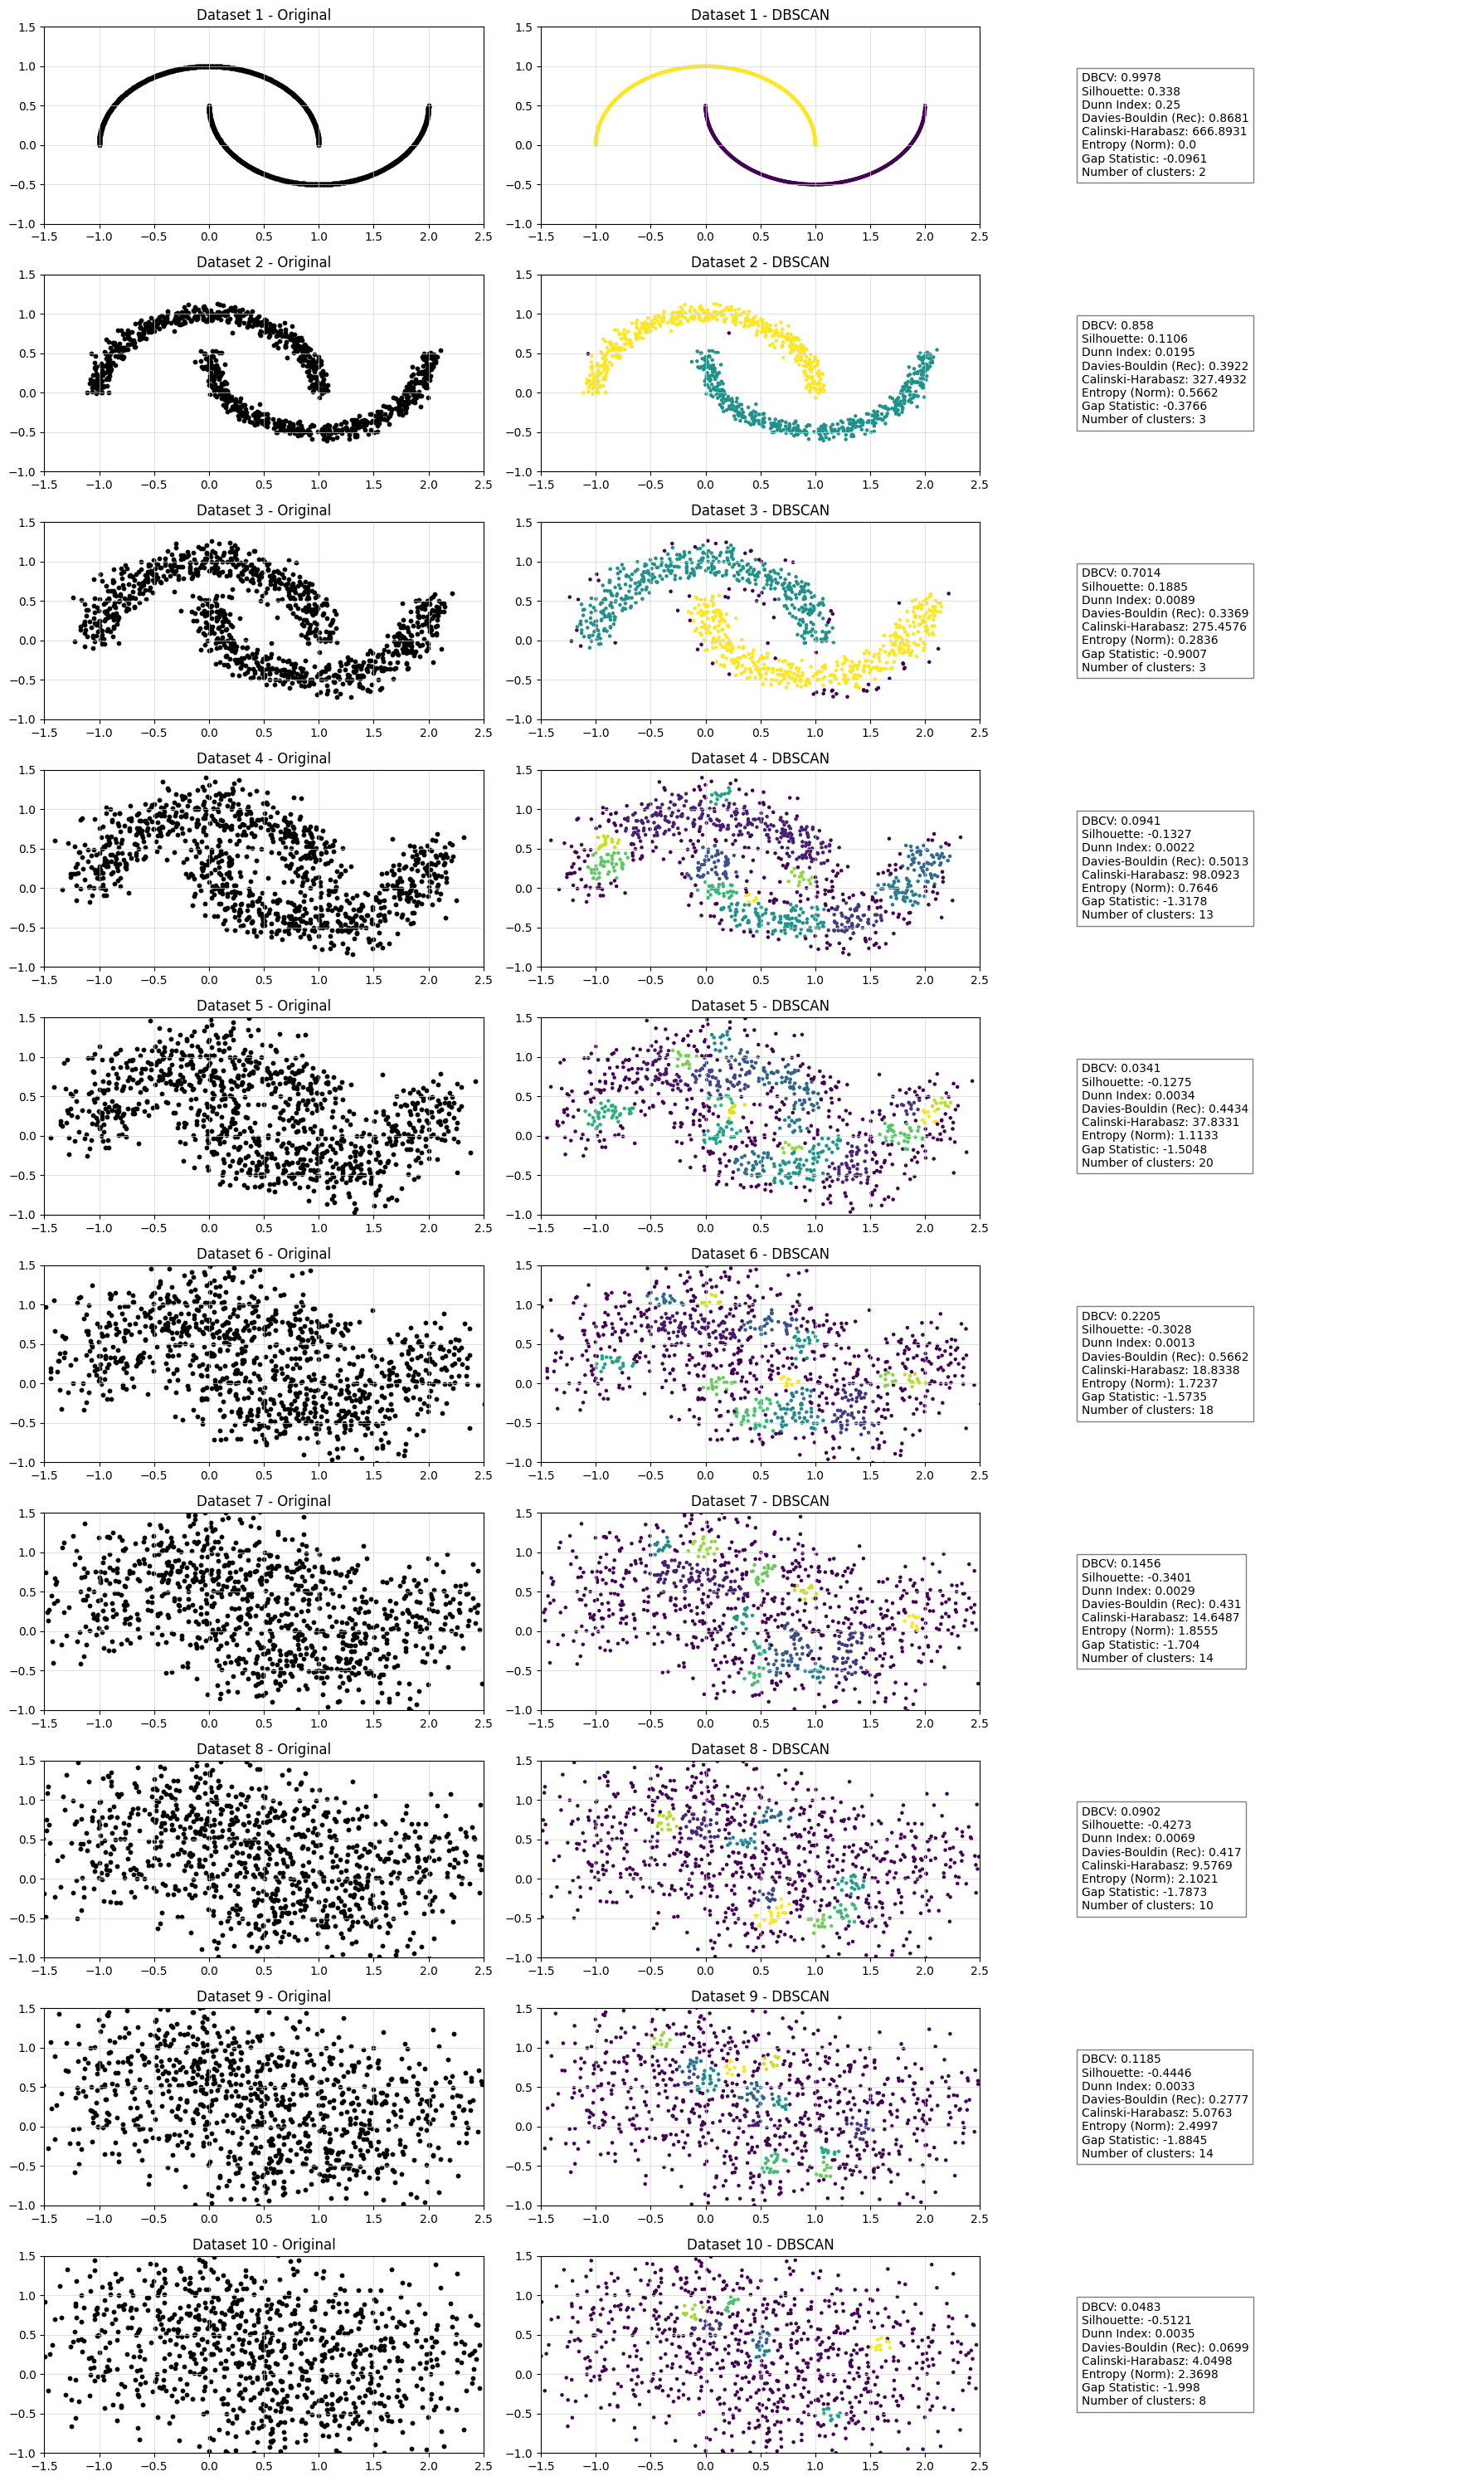

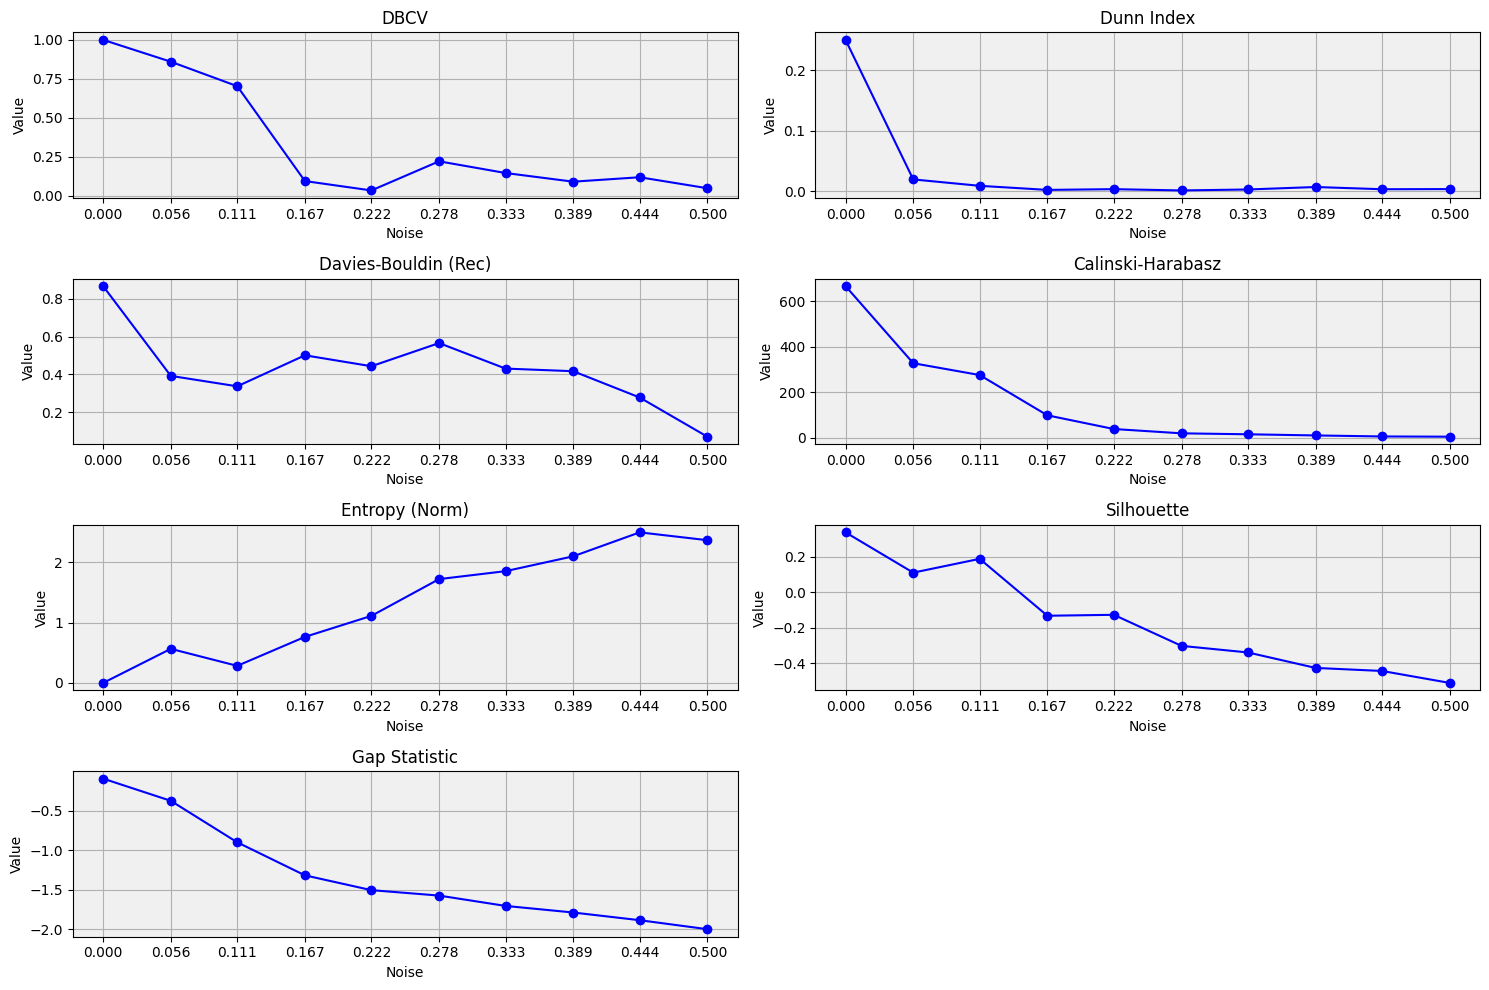

In [ ]:
datasets = generate_moon_datasets(30)
dbcv_total, dunn_total,davies_total, calinski_total,entropy_total, silhouette_total, gap_total = plot_datasets_with_clustering(datasets)
noise = [0.0, 0.056, 0.111, 0.167, 0.222, 0.278, 0.333, 0.389, 0.444, 0.5]

dbcv_total = list(zip(dbcv_total, noise))
dunn_total = list(zip(dunn_total, noise))
davies_total = list(zip(davies_total, noise))
calinski_total = list(zip(calinski_total, noise))
entropy_total = list(zip(entropy_total, noise))
silhouette_total = list(zip(silhouette_total, noise))
gap_total = list(zip(gap_total, noise))

data_list = [
    ("DBCV", dbcv_total),
    ("Dunn Index", dunn_total),
    ("Davies-Bouldin (Rec)", davies_total),
    ("Calinski-Harabasz", calinski_total),
    ("Entropy (Norm)", entropy_total),
    ("Silhouette", silhouette_total),
    ("Gap Statistic", gap_total)
]

plt.figure(figsize=(15, 10))

for i, (name, data) in enumerate(data_list):
    plt.subplot(4, 2, i + 1)
    y_values = [val[0] for val in data]
    x_values = [val[1] for val in data]

    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.title(name)

    plt.xlabel('Noise')
    plt.ylabel('Value')
    plt.xticks(x_values)

    plt.grid(True)
    plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()

**Circle**

Eseguito su 1000 campioni con normal dbcv. Questo perchè fastdbcv da errori di duplicati in fase di calcolo.
CI vuole circa mezz'ora.

Se diminuimo il numero di campioni a 300 il tempo diminuisce notevolmente a 2 minuti.

con 1000 camponi min_samples = 20
con 300 campioni min_samples = 6

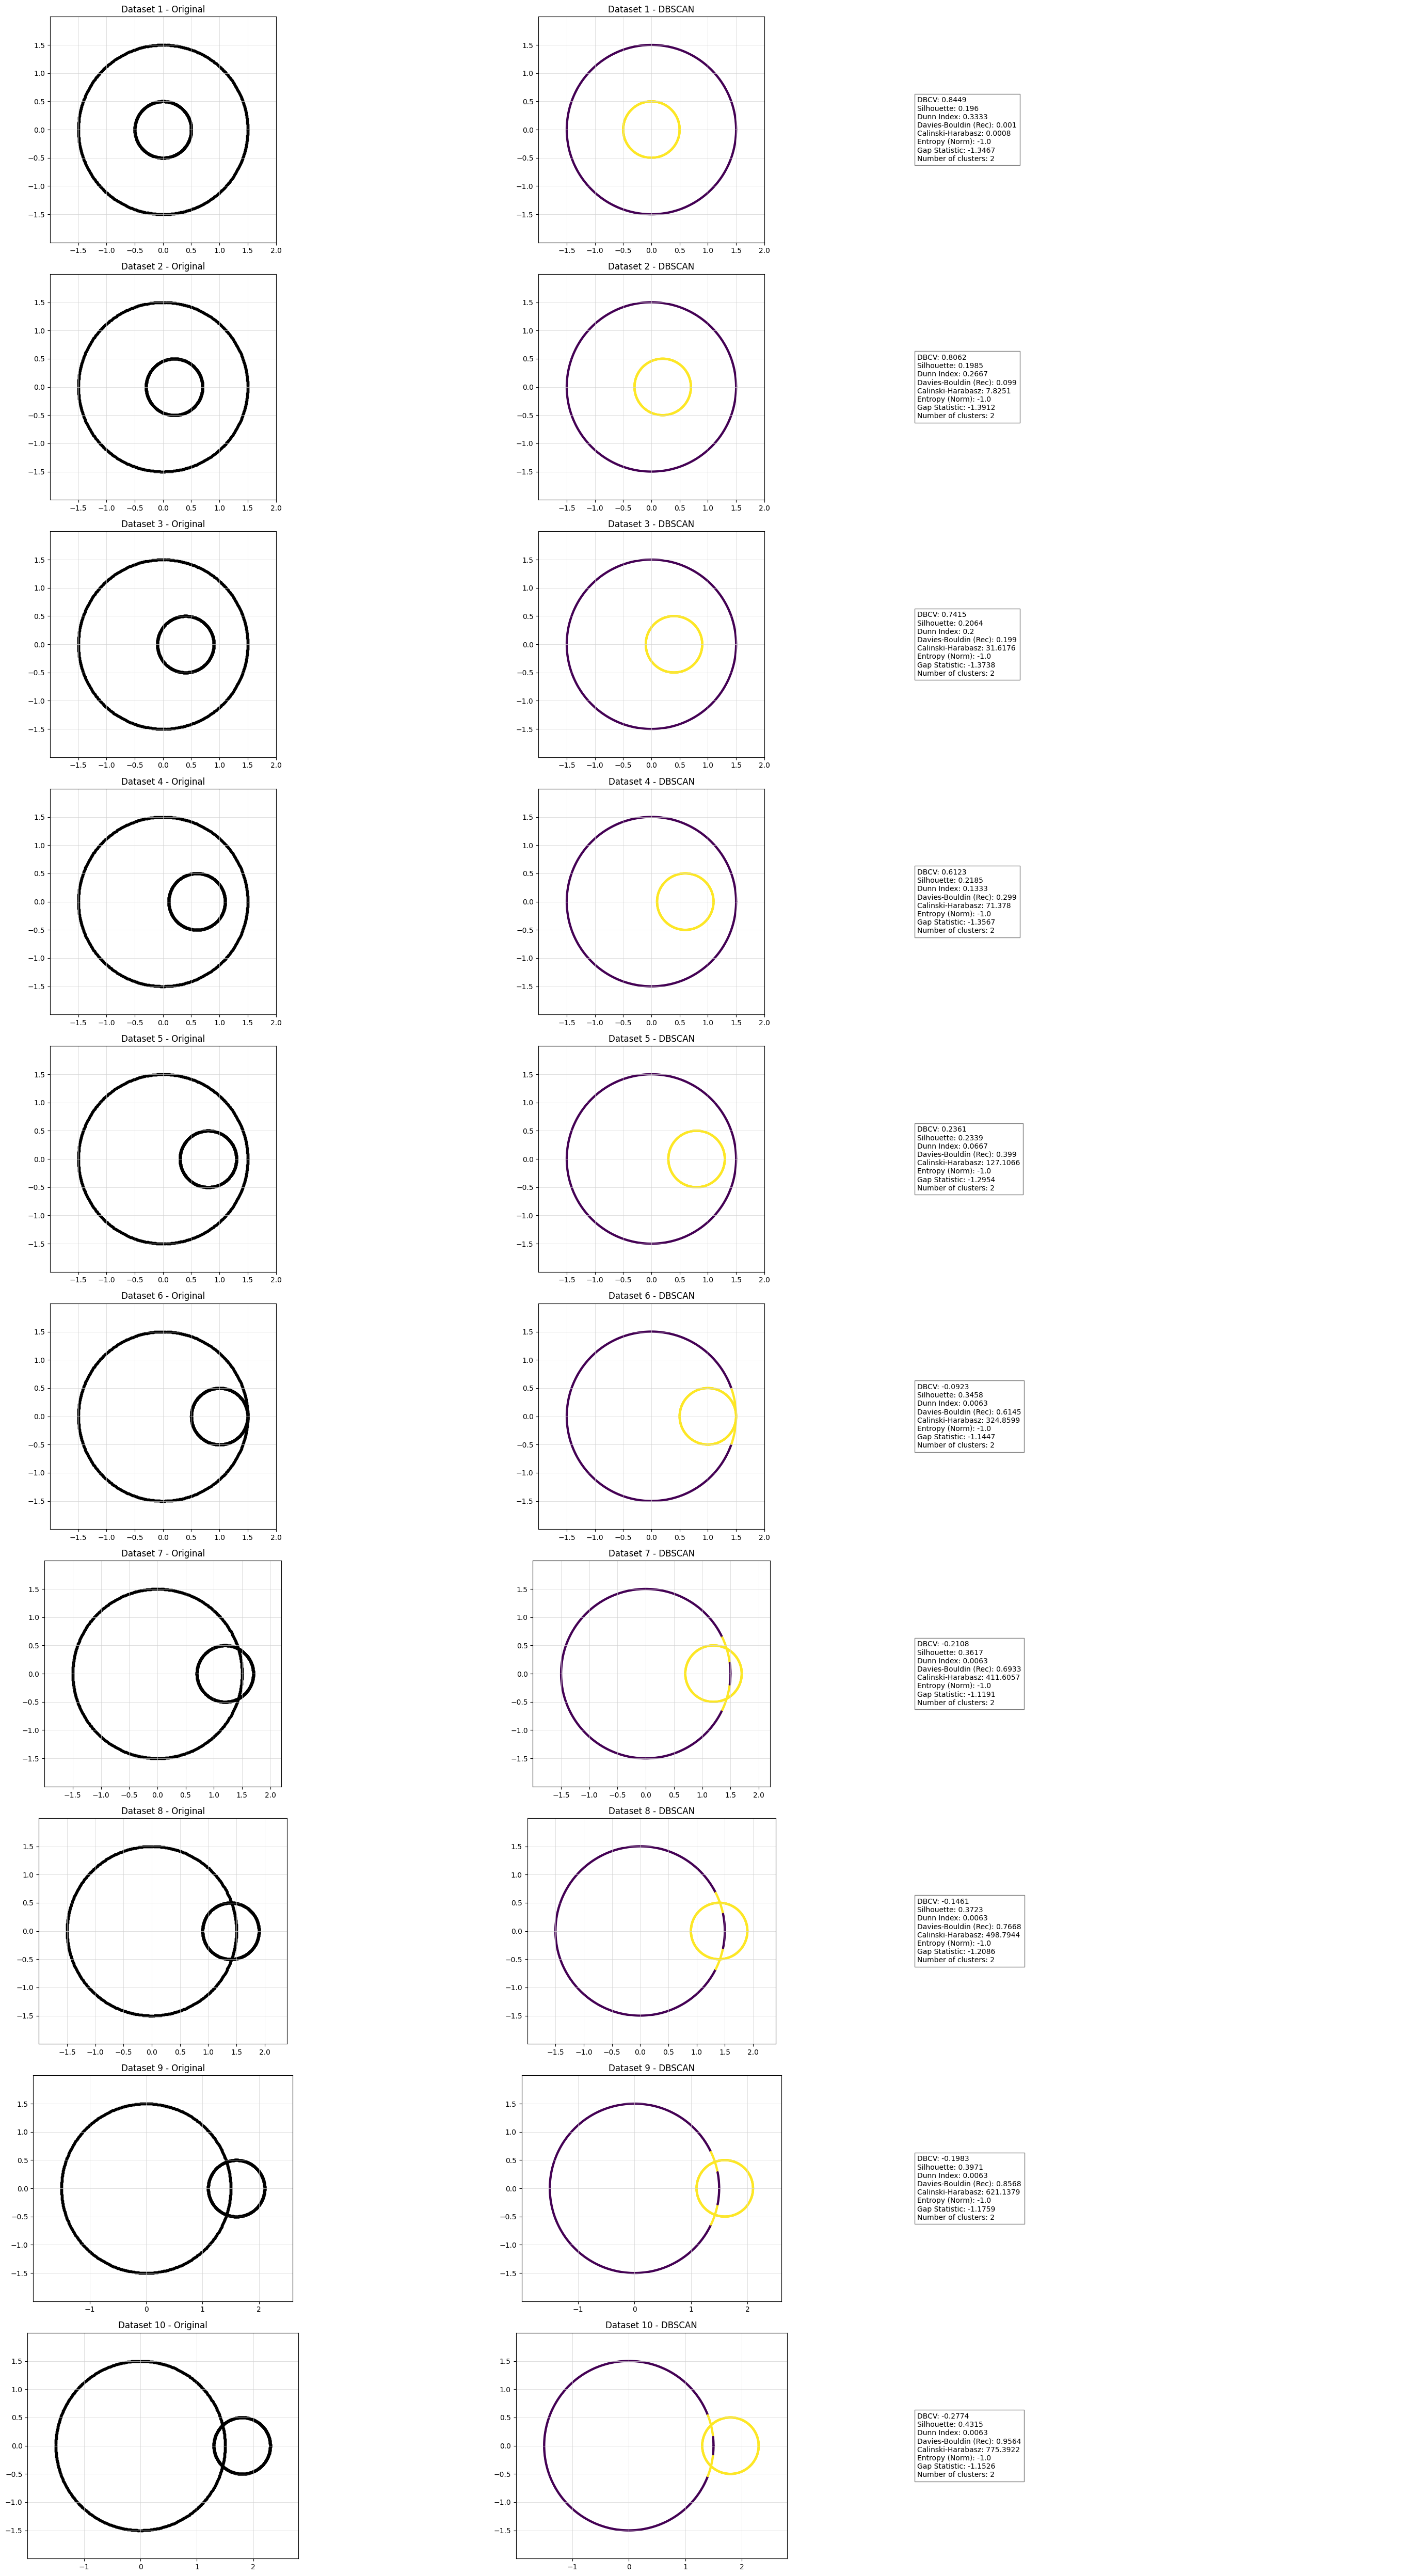

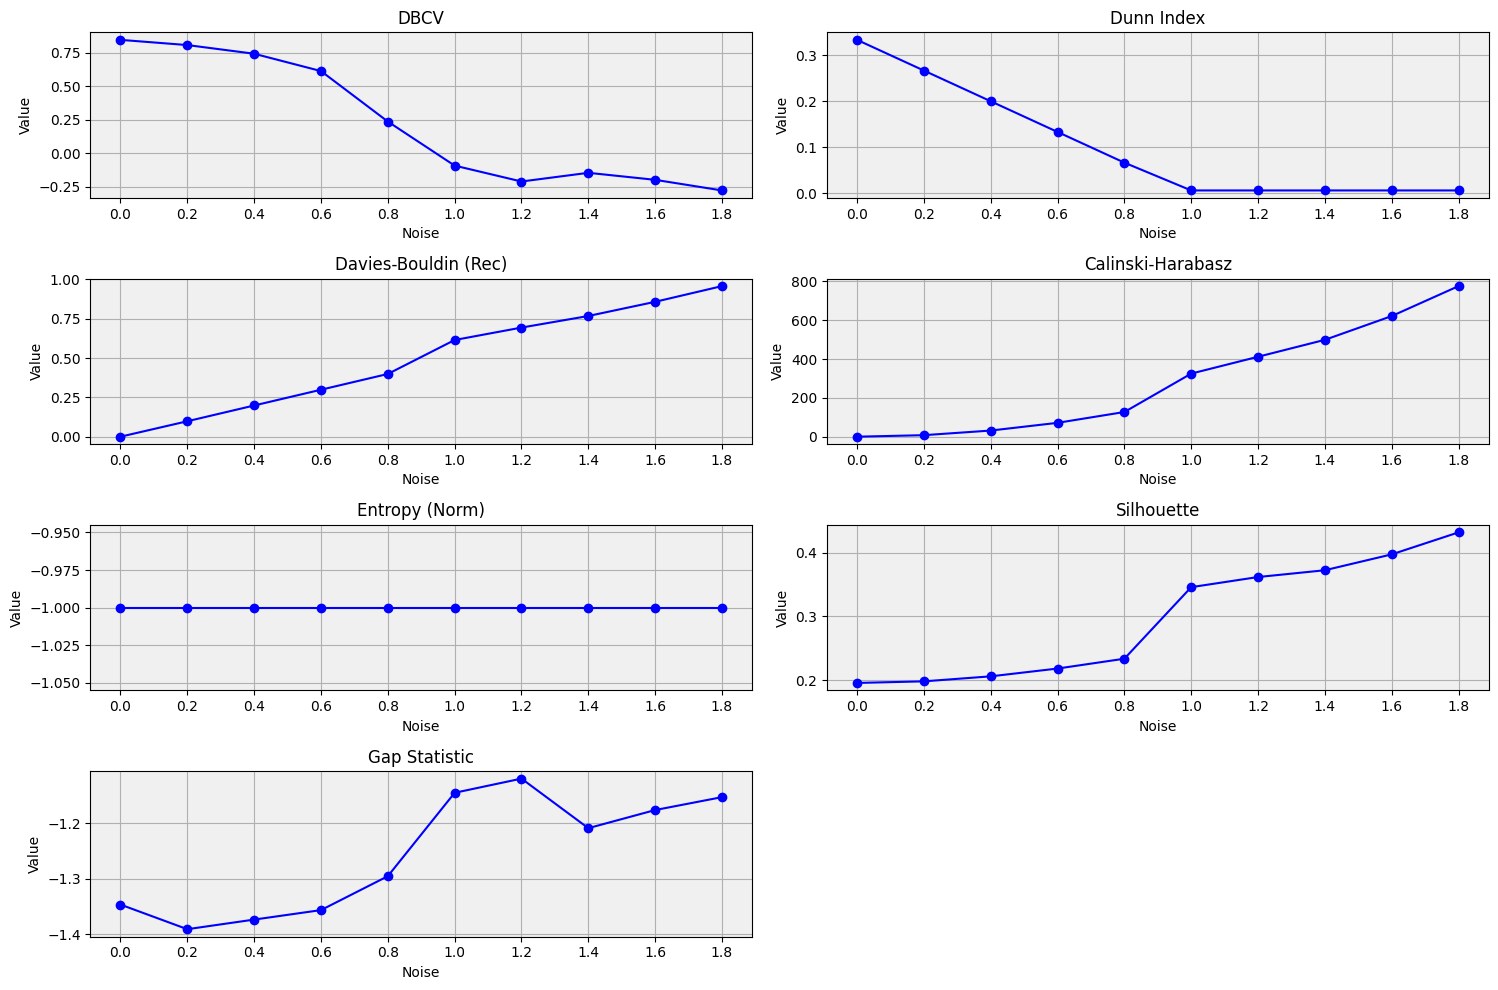

In [ ]:
n_datasets = 10
n_points_per_circle = 500
n_points_per_circle_inner = 500
inner_radius = 0.5
outer_radius = 1.5
initial_shift = (0, 0)
shift_increment = (0.2, 0)
datasets = generate_datasets_with_two_circles(n_datasets, n_points_per_circle, n_points_per_circle_inner, inner_radius, outer_radius, initial_shift, shift_increment)

dbcv_total, dunn_total,davies_total, calinski_total,entropy_total, silhouette_total, gap_total = plot_datasets_with_clustering_circle(datasets)

noise = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

dbcv_total = list(zip(dbcv_total, noise))
dunn_total = list(zip(dunn_total, noise))
davies_total = list(zip(davies_total, noise))
calinski_total = list(zip(calinski_total, noise))
entropy_total = list(zip(entropy_total, noise))
silhouette_total = list(zip(silhouette_total, noise))
gap_total = list(zip(gap_total, noise))

data_list = [
    ("DBCV", dbcv_total),
    ("Dunn Index", dunn_total),
    ("Davies-Bouldin (Rec)", davies_total),
    ("Calinski-Harabasz", calinski_total),
    ("Entropy (Norm)", entropy_total),
    ("Silhouette", silhouette_total),
    ("Gap Statistic", gap_total)
]

plt.figure(figsize=(15, 10))

for i, (name, data) in enumerate(data_list):
    plt.subplot(4, 2, i + 1)
    y_values = [val[0] for val in data]
    x_values = [val[1] for val in data]
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.title(name)

    plt.xlabel('Noise')
    plt.ylabel('Value')
    plt.xticks(x_values)

    plt.grid(True)
    plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()


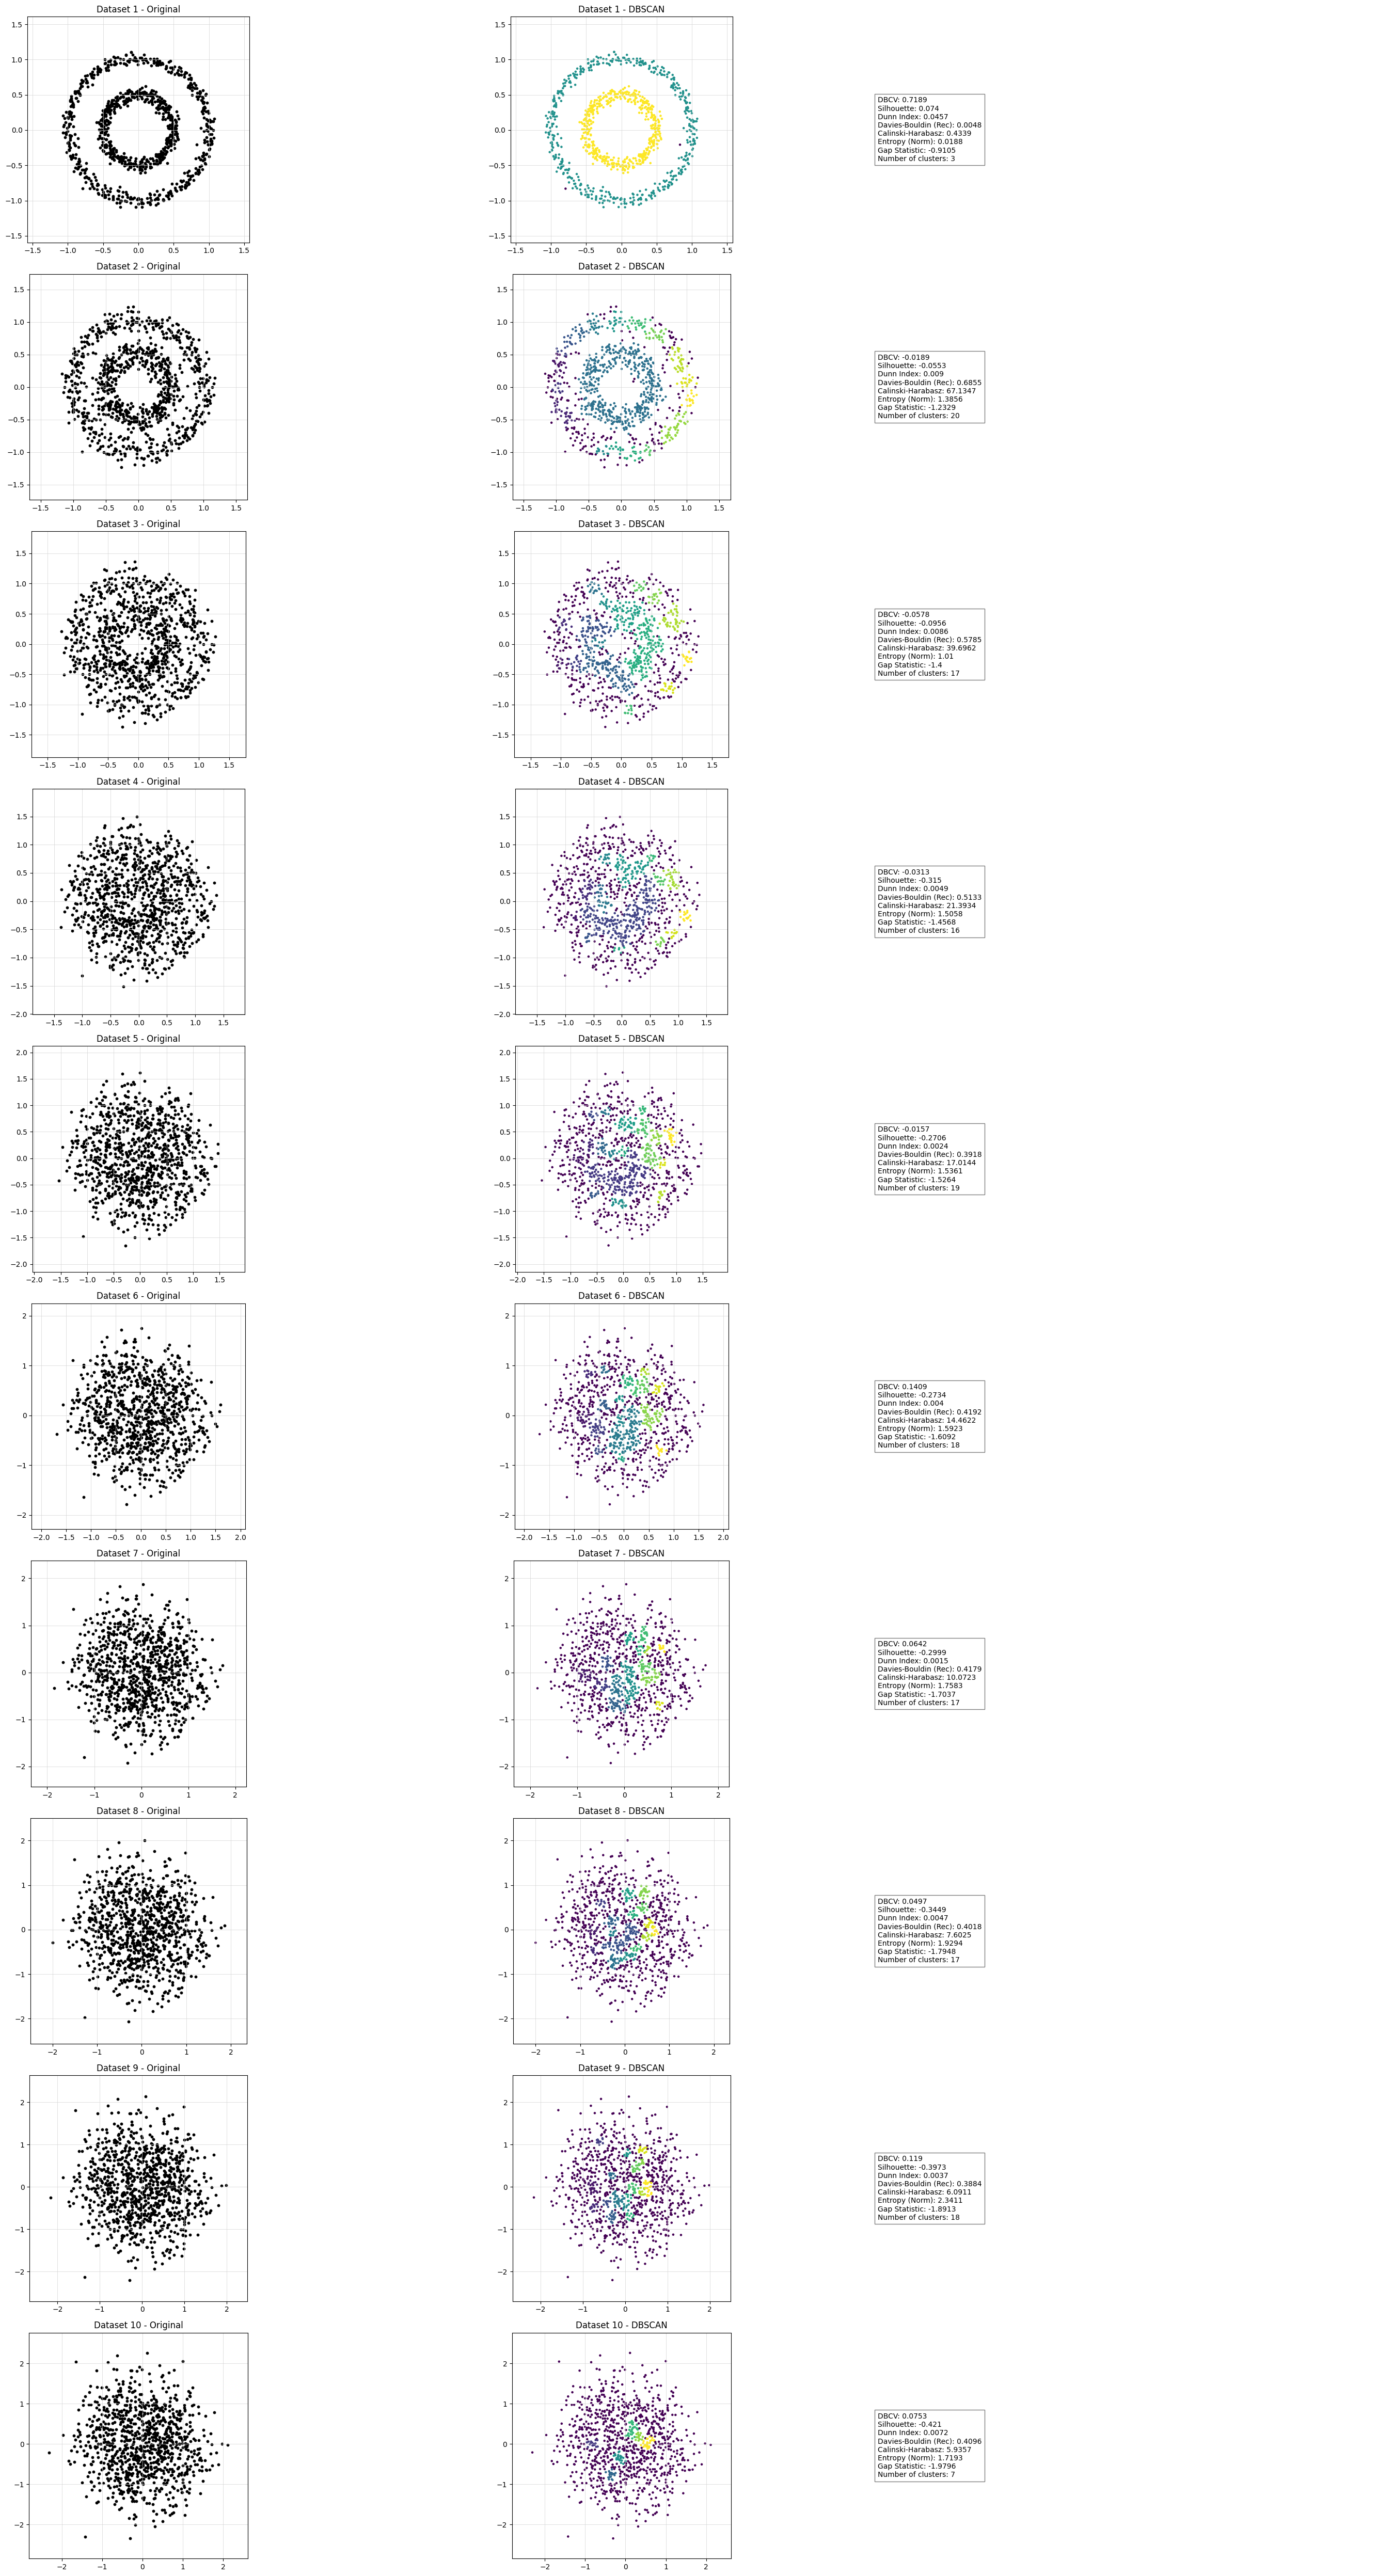

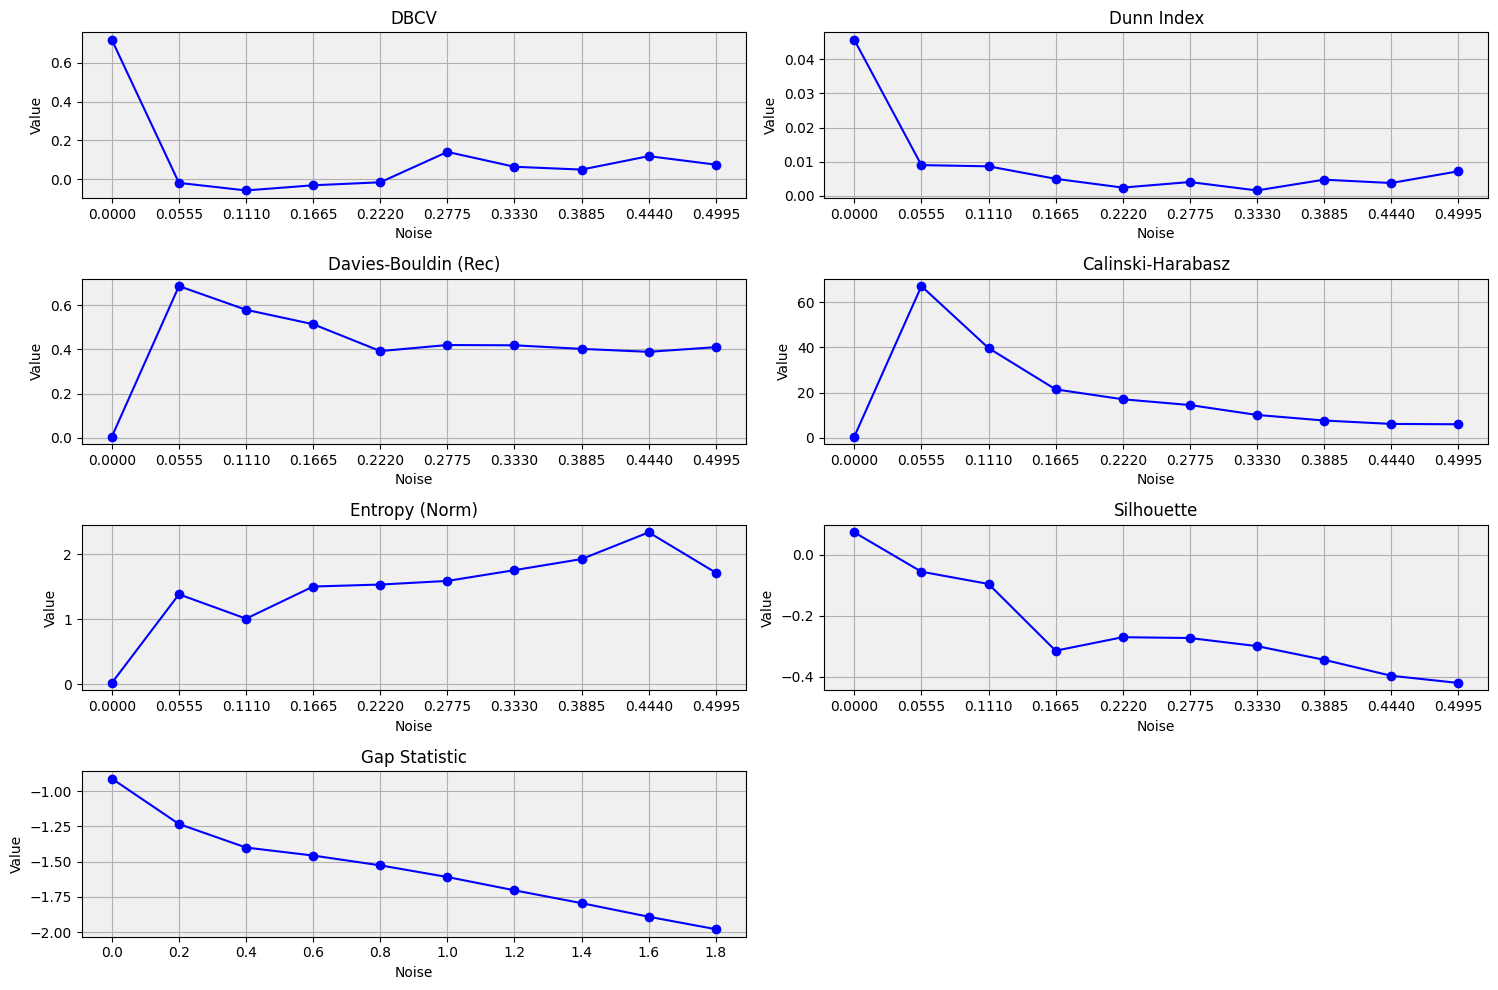

In [ ]:
n_datasets = 10
n_samples = 1000
noise_increment = 0.0555
seed = 4

#noise_levels = [0.0, 0.056, 0.111, 0.167, 0.222, 0.278, 0.333, 0.389, 0.444, 0.5]


datasets = generate_noisy_circles(n_datasets, n_samples, noise_increment, seed)


dbcv_total, dunn_total, davies_total, calinski_total, entropy_total, silhouette_total, gap_total = plot_datasets_with_clustering_noisy_circles(datasets)
noise_levels = [i * noise_increment for i in range(n_datasets)]

dbcv_total = list(zip(dbcv_total, noise_levels))
dunn_total = list(zip(dunn_total, noise_levels))
davies_total = list(zip(davies_total, noise_levels))
calinski_total = list(zip(calinski_total, noise_levels))
entropy_total = list(zip(entropy_total, noise_levels))
silhouette_total = list(zip(silhouette_total, noise_levels))
gap_total = list(zip(gap_total, noise))
data_list = [
    ("DBCV", dbcv_total),
    ("Dunn Index", dunn_total),
    ("Davies-Bouldin (Rec)", davies_total),
    ("Calinski-Harabasz", calinski_total),
    ("Entropy (Norm)", entropy_total),
    ("Silhouette", silhouette_total),
    ("Gap Statistic", gap_total)

]

plt.figure(figsize=(15, 10))

for i, (name, data) in enumerate(data_list):
    plt.subplot(4, 2, i + 1)
    y_values = [val[0] for val in data]
    x_values = [val[1] for val in data]
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.title(name)

    plt.xlabel('Noise')
    plt.ylabel('Value')
    plt.xticks(x_values)

    plt.grid(True)
    plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()


**Tulipan**

Inserire dataset con punti più raggruppati

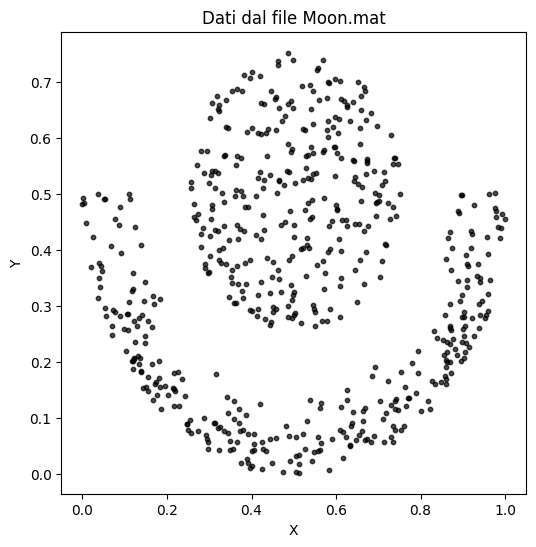

In [ ]:
# preso da https://github.com/adanjoga/cvik-toolbox/tree/master/datasets
#paper A survey of cluster validity indices for automatic data clustering using differential evolution

data = scipy.io.loadmat('/content/Moon.mat')

X = data['data'][:, 0]
Y = data['data'][:, 1]

plt.figure(figsize=(6, 6))
plt.scatter(X, Y, color='black', alpha=0.7, s=10)
plt.title("Dati dal file Moon.mat")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


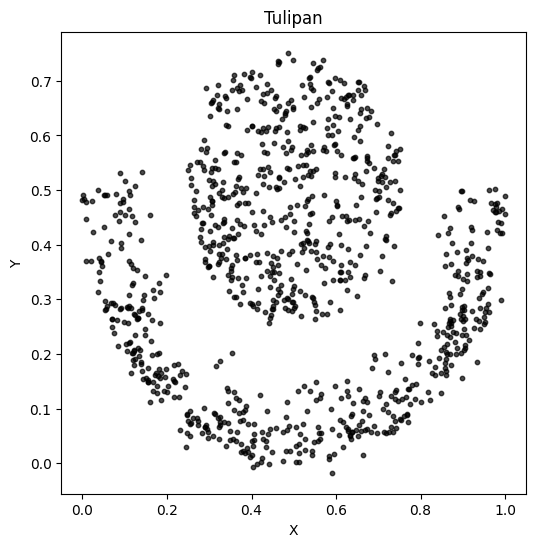

In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

data = scipy.io.loadmat('/content/Moon.mat')
X = data['data'][:, 0]
Y = data['data'][:, 1]


original_points = np.column_stack((X, Y))

# Generate 400 new points by sampling around the existing data
# Adding some random noise to keep them close to the existing distribution
num_new_points = 400
new_points = original_points[np.random.choice(original_points.shape[0], num_new_points)] + np.random.normal(0, 0.02, (num_new_points, 2))
augmented_data = np.vstack((original_points, new_points))
X_augmented = augmented_data[:, 0]
Y_augmented = augmented_data[:, 1]

plt.figure(figsize=(6, 6))
plt.scatter(X_augmented, Y_augmented, color='black', alpha=0.7, s=10)
plt.title("Tulipan")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

AL dataset originale sono dati aggiutni 400 punti (essendo 600 quelli attuali). I 600 attualirimangono fissi, viene aggiunto del rumore ai 400 inseriti , normalizzando il loro valore tra 0 e 1 in modo da essere inseritiall'interno del tulipano e non all'esterno

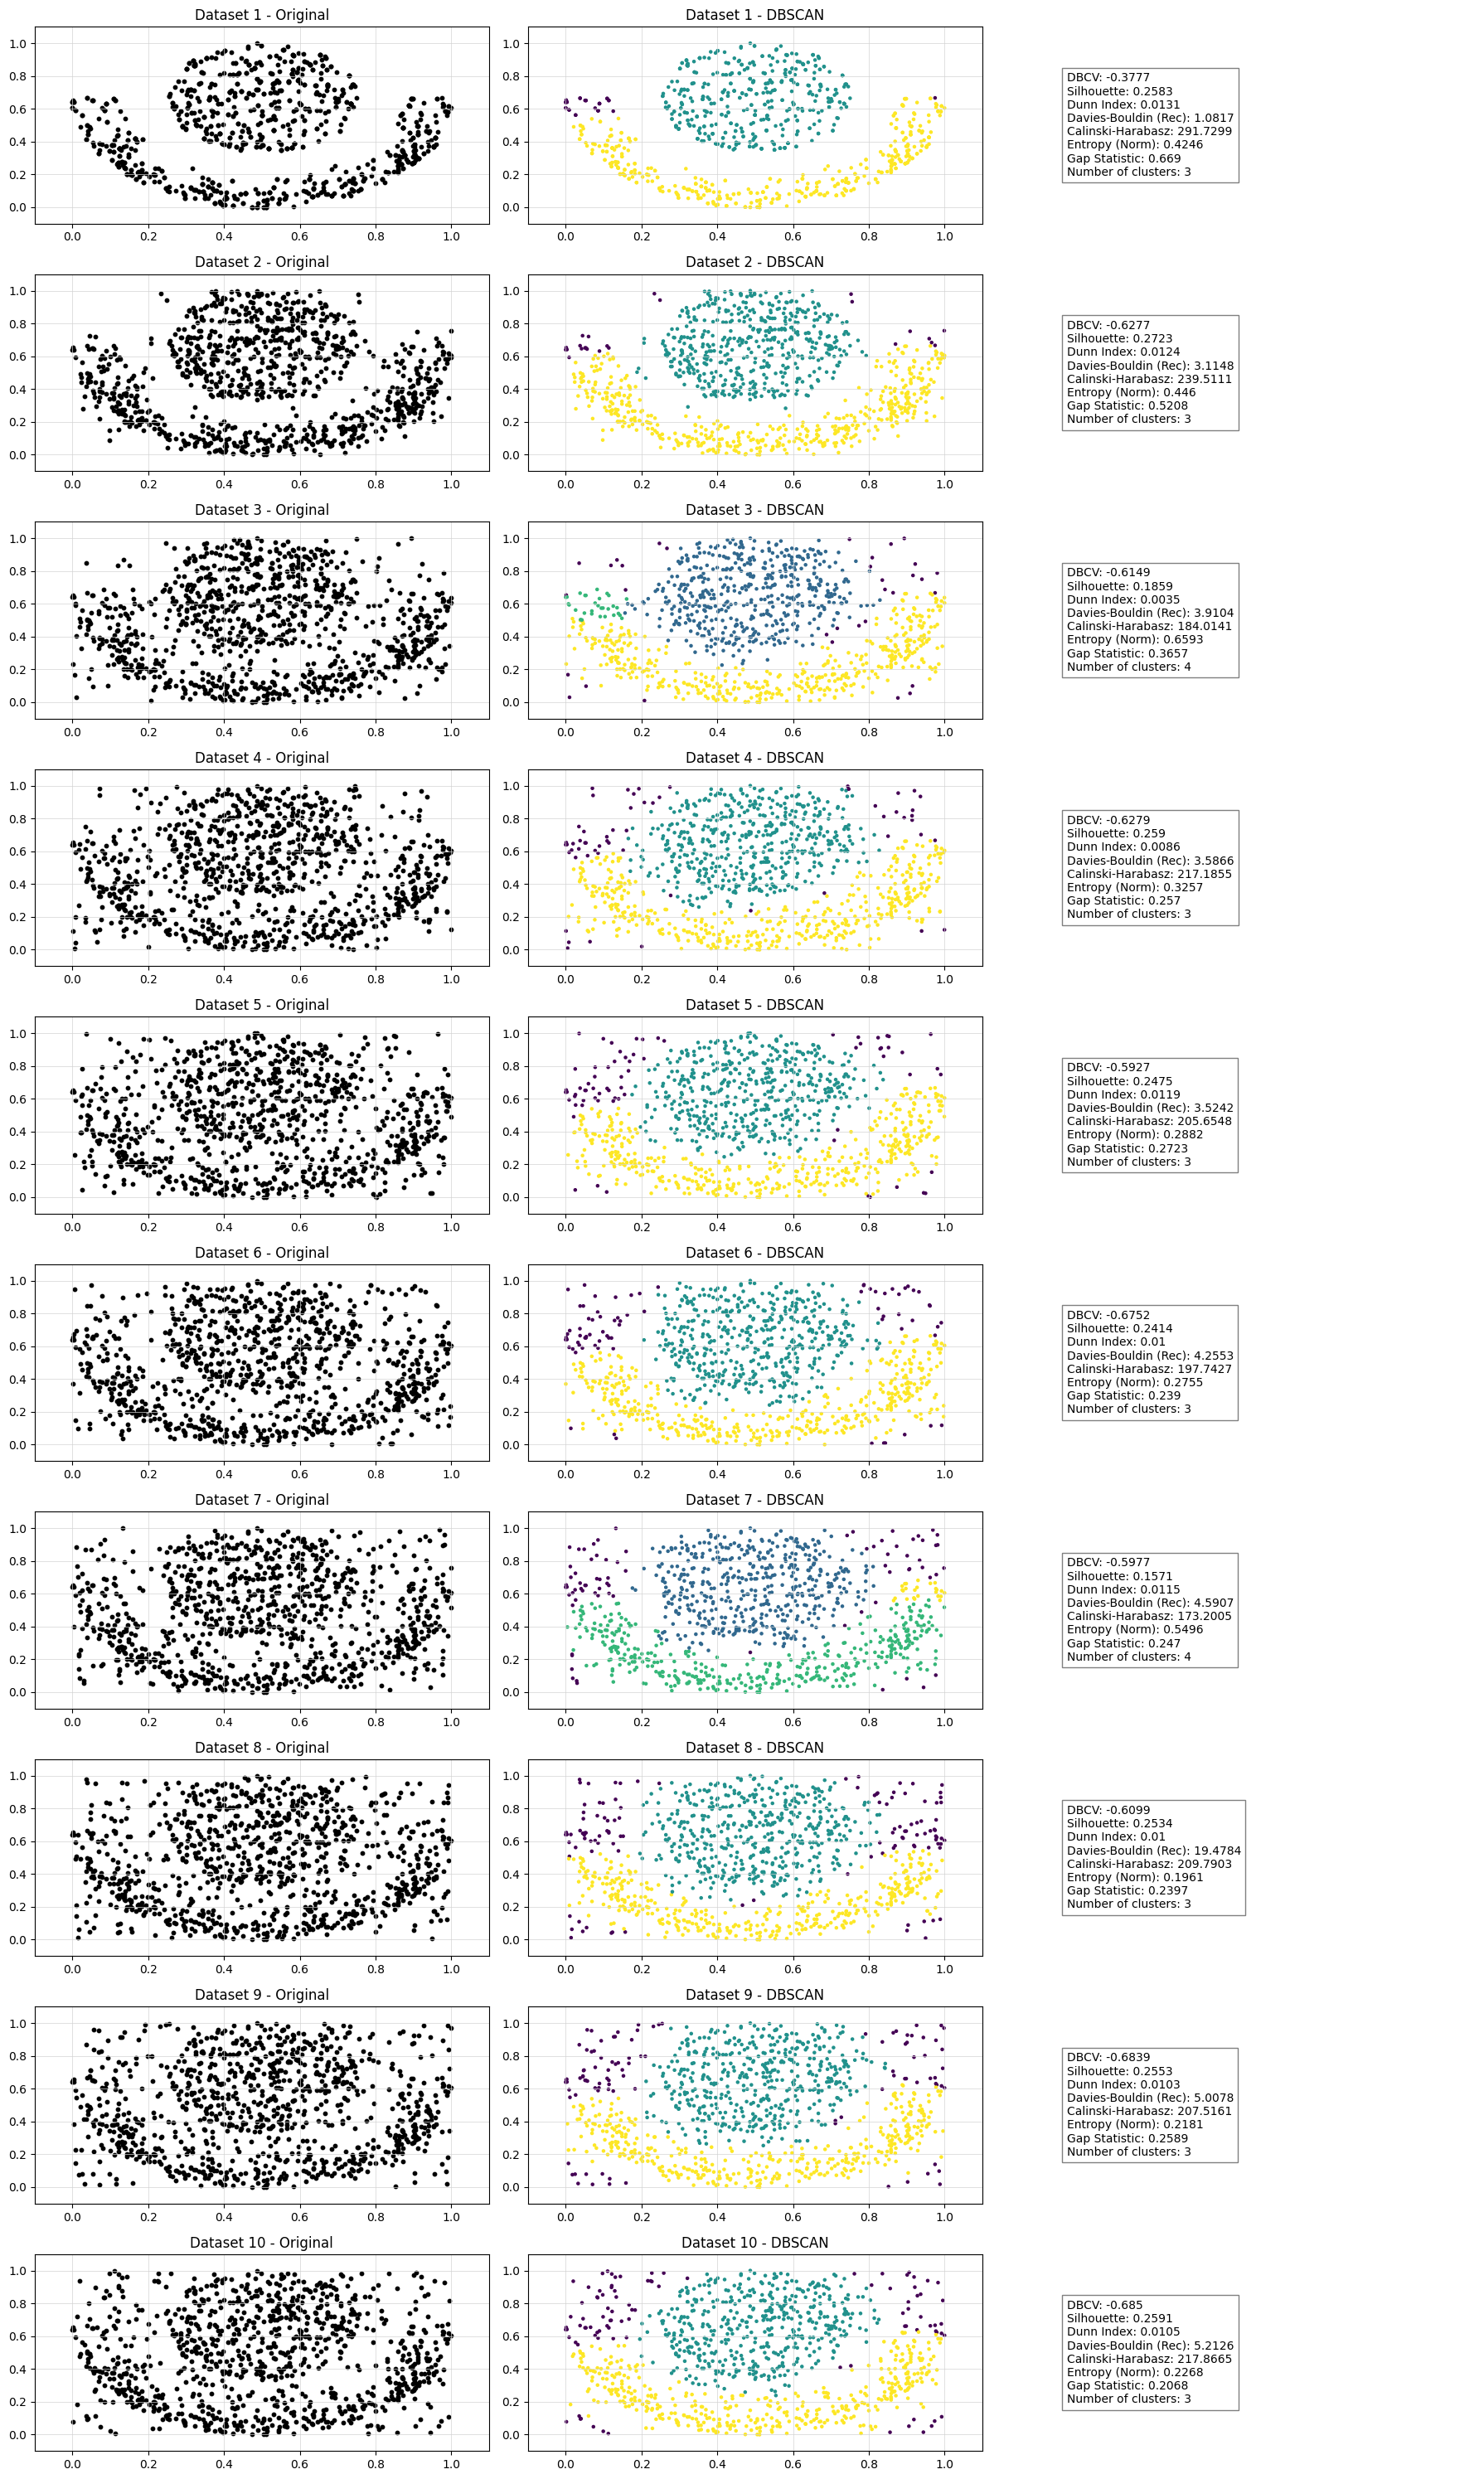

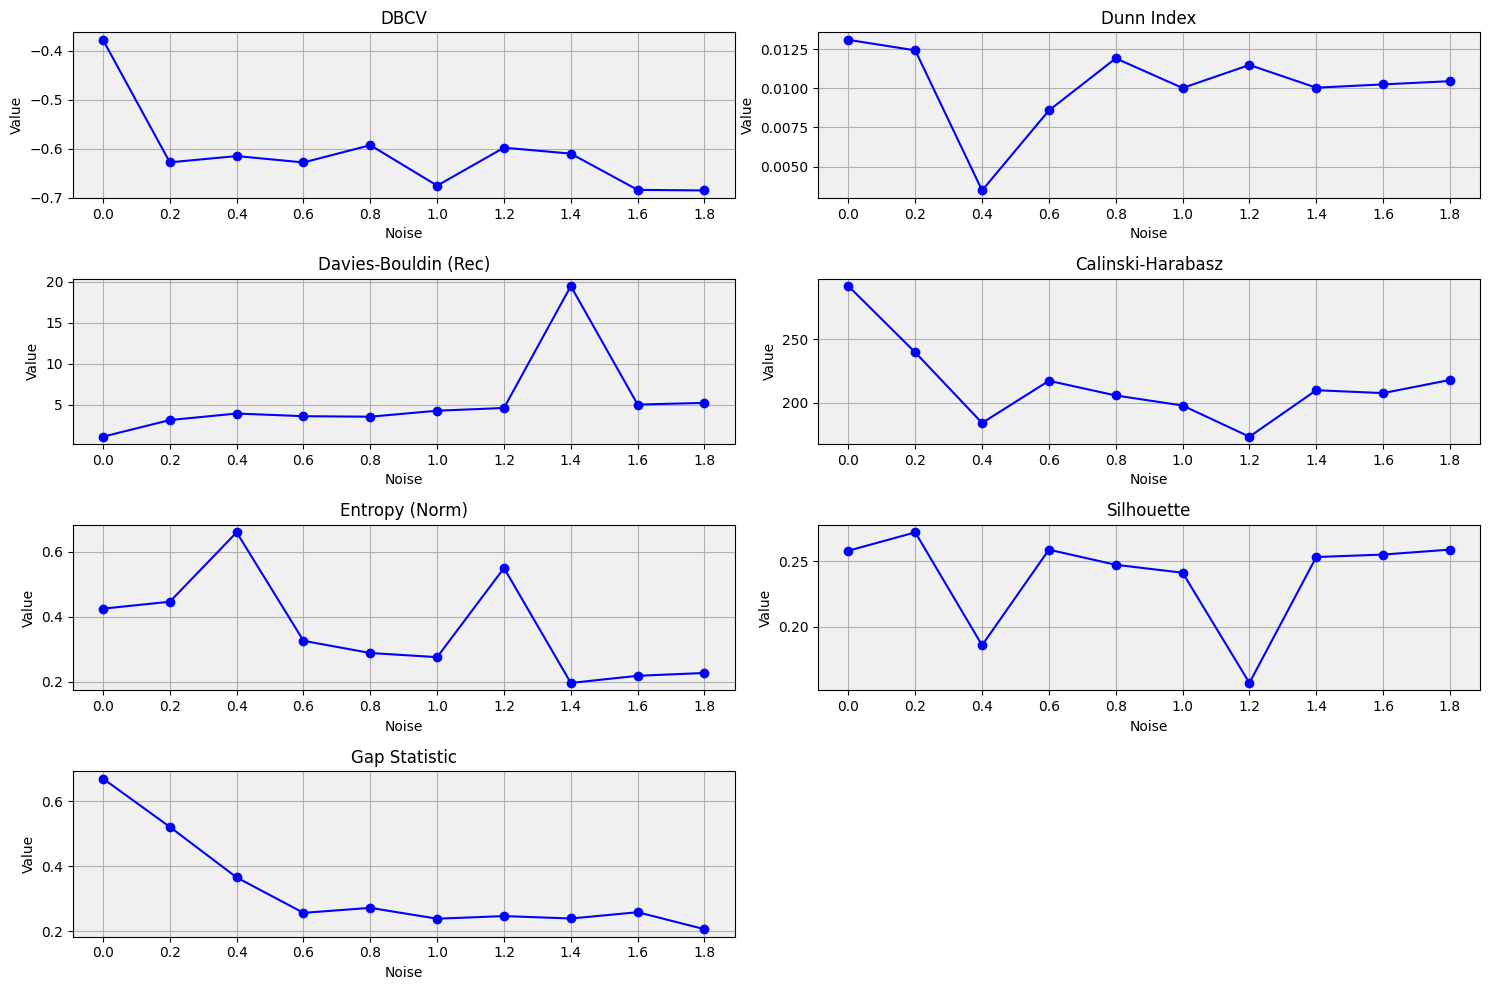

In [ ]:
data = scipy.io.loadmat('/content/Moon.mat')
X = data['data'][:, 0]
Y = data['data'][:, 1]
original_points = np.column_stack((X, Y))

min_vals = original_points.min(axis=0)
max_vals = original_points.max(axis=0)
normalized_points = (original_points - min_vals) / (max_vals - min_vals)

datasets = generate_augmented_datasets(30)
results = analyze_datasets_tulipan(datasets)
dbcv_total, dunn_total, davies_total, calinski_total, entropy_total, silhouette_total, gap_total = plot_datasets_with_clustering_tulipan(datasets, results)

noise_levels = [0.0, 0.056, 0.111, 0.167, 0.222, 0.278, 0.333, 0.389, 0.444, 0.5]

dbcv_total = list(zip(dbcv_total, noise))
dunn_total = list(zip(dunn_total, noise))
davies_total = list(zip(davies_total, noise))
calinski_total = list(zip(calinski_total, noise))
entropy_total = list(zip(entropy_total, noise))
silhouette_total = list(zip(silhouette_total, noise))
gap_total = list(zip(gap_total, noise))

data_list = [
    ("DBCV", dbcv_total),
    ("Dunn Index", dunn_total),
    ("Davies-Bouldin (Rec)", davies_total),
    ("Calinski-Harabasz", calinski_total),
    ("Entropy (Norm)", entropy_total),
    ("Silhouette", silhouette_total),
    ("Gap Statistic", gap_total)
]

plt.figure(figsize=(15, 10))
for i, (name, data) in enumerate(data_list):
    plt.subplot(4, 2, i + 1)
    y_values = [val[0] for val in data]
    x_values = [val[1] for val in data]
    plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.title(name)
    plt.xlabel('Noise')
    plt.ylabel('Value')
    plt.xticks(x_values)
    plt.grid(True)
    plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()


#**EHRs**

In [161]:
neuroblastoma=pd.read_csv("/content/10_7717_peerj_5665_dataYM2018_neuroblastoma.csv")
diabetes=pd.read_csv("/content/journal.pone.0216416_Takashi2019_diabetes_type1_dataset_preprocessed.csv")
sepsis=pd.read_csv("/content/journal.pone.0148699_S1_Text_Sepsis_SIRS_EDITED.csv")
heart_failure=pd.read_csv("/content/journal.pone.0158570_S2File_depression_heart_failure_v2.csv")
cardiac_arrest=pd.read_csv("/content/journal.pone.0175818_S1Dataset_Spain_cardiac_arrest_EDITED..csv")
df_metrics=pd.DataFrame()

#**Neuroblastoma**

In [107]:
neuroblastoma = neuroblastoma.dropna(thresh=neuroblastoma.shape[1] - 2)
numerical_features = neuroblastoma.columns
scaler_minmax = MinMaxScaler()
neuroblastoma_scaled = neuroblastoma.copy()
neuroblastoma_scaled[numerical_features] = scaler_minmax.fit_transform(neuroblastoma[numerical_features])
neuroblastoma_scaled.reset_index(drop=True, inplace=True)
neuroblastoma_scaled.drop_duplicates(inplace=True)
df_metrics_neuroblastoma = pd.DataFrame()
neuroblastoma_scaled

age  sex  site  stage  risk  time_months  \
0    1.0  0.0   0.0    1.0   1.0     0.060606   
1    1.0  0.0   0.0    1.0   1.0     0.181818   
2    0.5  0.0   0.0    1.0   1.0     0.242424   
3    0.5  0.0   0.0    1.0   1.0     0.070707   
4    0.5  0.0   0.0    1.0   1.0     0.464646   
..   ...  ...   ...    ...   ...          ...   
164  0.0  0.0   0.0    0.0   0.0     0.353535   
165  0.5  0.0   0.0    0.0   0.0     0.171717   
166  0.5  1.0   0.5    0.0   0.0     0.373737   
167  0.5  1.0   0.5    0.0   0.0     0.363636   
168  0.0  0.0   0.0    0.0   0.0     0.313131   

     autologous_stem_cell_transplantation  radiation  \
0                                     0.0        0.0   
1                                     0.0        1.0   
2                                     0.0        1.0   
3                                     0.0        0.0   
4                                     1.0        1.0   
..                                    ...        ...   
164                                   0.0        0.0   
165                                   0.0        0.0   
166                                   0.0        0.0   
167                                   0.0        0.0   
168                                   0.0        0.0   

     degree_of_differentiation  UH_or_FH  MYCN_status   surgical_methods  \
0                          0.0       0.0           1.0               1.0   
1                          0.0       0.0           1.0               1.0   
2                          0.5       0.0           1.0               0.0   
3                          0.5       0.0           1.0               1.0   
4                          0.5       0.0           1.0               0.0   
..                         ...       ...           ...               ...   
164                        0.0       0.0           1.0               0.0   
165                        0.5       1.0           1.0               1.0   
166                        1.0       1.0           1.0               0.0   
167                        0.5       1.0           1.0               0.0   
168                        0.0       0.0           1.0               0.0   

     outcome  
0        0.0  
1        1.0  
2        1.0  
3        0.0  
4        1.0  
..       ...  
164      0.0  
165      1.0  
166      0.0  
167      0.0  
168      0.0  

[168 rows x 13 columns]

**HSBSCAN**

In [108]:
min_size, epsilon= best_params_hdbscan(neuroblastoma_scaled)
hdbscan_cluster= hdbscan.HDBSCAN(min_cluster_size=min_size, cluster_selection_epsilon=epsilon)
labels = hdbscan_cluster.fit_predict(neuroblastoma_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(neuroblastoma_scaled, labels)
neuroblastoma_scaled['HDBSCAN_pred'] = labels
methods = 'HDBSCAN'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_neuroblastoma = pd.concat([df_metrics_neuroblastoma, metrics_df], ignore_index=True)


min_cluster_size: 15, cluster_selection_epsilon: 0.01


**DBSCAN**

In [109]:
min_sample, eps = best_params_dbscan(neuroblastoma_scaled)
dbscan = DBSCAN(min_samples=min_sample, eps=eps)
labels = dbscan.fit_predict(neuroblastoma_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(neuroblastoma_scaled, labels)
neuroblastoma_scaled['DBSCAN_pred'] = labels

methods = 'DBSCAN'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_neuroblastoma = pd.concat([df_metrics_neuroblastoma, metrics_df], ignore_index=True)

min_cluster_size: 3, cluster_selection_epsilon: 0.5


**Mean_Shift**

In [110]:
band = best_params_mean_shift(neuroblastoma_scaled)
mean_shift = MeanShift(bandwidth=band)
labels = mean_shift.fit_predict(neuroblastoma_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(neuroblastoma_scaled, labels)
neuroblastoma_scaled['Mean_shift_pred'] = labels

methods = 'Mean_shift'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_neuroblastoma = pd.concat([df_metrics_neuroblastoma, metrics_df], ignore_index=True)
df_metrics_neuroblastoma

Errore calcolando DBCV per banda 0.292: zero-size array to reduction operation maximum which has no identity
Errore calcolando DBCV per banda 0.877: zero-size array to reduction operation maximum which has no identity
Errore calcolando DBCV per banda 1.461: zero-size array to reduction operation maximum which has no identity
Best bandwidth: 4.967


Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN        0.50        0.18    0.068486                 0.40   
1      DBSCAN        0.26       -0.06    0.126740                 0.75   
2  Mean_shift       -0.34        0.66    0.146175                 1.73   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  
0              22.48                  0.45                  -0.01  
1               3.42                  1.85                   0.04  
2             423.65                  0.19                  -0.14

**Cluster Analysis**

In [111]:
cluster_similarity = similar_cluster(neuroblastoma_scaled)
cluster_similarity

[0 1]
[-1  0  1  2  3  6  4  5  7  8  9 10 12 11 13]
[ 0 -1  1]


Mean_shift  DBSCAN  HDBSCAN  Percentuale
0            0      -1        0    42.857143
1            0      -1       -1    19.642857
2            0      -1        1     6.547619
57           1       3        0     3.571429
60           1       6        0     2.976190
..         ...     ...      ...          ...
33           0      10        0     0.000000
32           0       9        1     0.000000
31           0       9       -1     0.000000
30           0       9        0     0.000000
45           1      -1        0     0.000000

[90 rows x 4 columns]

In [112]:
neuroblastoma_scaled["DBSCAN_pred"] = neuroblastoma_scaled["DBSCAN_pred"].astype(object)
neuroblastoma_scaled["HDBSCAN_pred"] = neuroblastoma_scaled["HDBSCAN_pred"].astype(object)
neuroblastoma_scaled["Mean_shift_pred"] = neuroblastoma_scaled["Mean_shift_pred"].astype(object)

neuroblastoma_scaled.loc[neuroblastoma_scaled["DBSCAN_pred"] == -1, "DBSCAN_pred"] = 'A'
neuroblastoma_scaled.loc[neuroblastoma_scaled["HDBSCAN_pred"] == 0, "HDBSCAN_pred"] = 'A'
neuroblastoma_scaled.loc[neuroblastoma_scaled["Mean_shift_pred"] == 0, "Mean_shift_pred"] = 'A'

neuroblastoma_scaled.loc[neuroblastoma_scaled["DBSCAN_pred"] == 13, "DBSCAN_pred"] = 'B'
neuroblastoma_scaled.loc[neuroblastoma_scaled["HDBSCAN_pred"] == 1, "HDBSCAN_pred"] = 'B'
neuroblastoma_scaled.loc[neuroblastoma_scaled["Mean_shift_pred"] == 1, "Mean_shift_pred"] = 'B'


neuroblastoma_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]] = (
    neuroblastoma_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]]
    .replace({'A': 0, 'B': 1})
    .astype(int)
)

same_value_count = (neuroblastoma_scaled["HDBSCAN_pred"] == neuroblastoma_scaled["DBSCAN_pred"]) & \
                   (neuroblastoma_scaled["DBSCAN_pred"] == neuroblastoma_scaled["Mean_shift_pred"])

total_same_value = same_value_count.sum()
total_rows = len(neuroblastoma_scaled)

percentage_same_value = (total_same_value / total_rows) * 100
print("Totale delle righe con lo stesso valore:", total_same_value)
print("Percentuale rispetto al totale:", round(percentage_same_value,2), "%")
percentage_same_value = round((percentage_same_value / 100),3)
ari = compute_ari(neuroblastoma_scaled)
df_metrics_neuroblastoma['Correct prediction'] = percentage_same_value
df_metrics_neuroblastoma['ARI'] = ari
df_metrics_neuroblastoma

Totale delle righe con lo stesso valore: 81
Percentuale rispetto al totale: 48.21 %


Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN        0.50        0.18    0.068486                 0.40   
1      DBSCAN        0.26       -0.06    0.126740                 0.75   
2  Mean_shift       -0.34        0.66    0.146175                 1.73   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  \
0              22.48                  0.45                  -0.01   
1               3.42                  1.85                   0.04   
2             423.65                  0.19                  -0.14   

   Correct prediction       ARI  
0               0.482  0.321206  
1               0.482  0.321206  
2               0.482  0.321206

In [113]:
df_metrics_neuroblastoma["Silhouette"] = (df_metrics_neuroblastoma["Silhouette"] + 1) / 2
df_metrics_neuroblastoma["DBCV Score"] = (df_metrics_neuroblastoma["DBCV Score"] + 1) / 2
df_metrics_neuroblastoma["Dunn Index"] = (erf(df_metrics_neuroblastoma["Dunn Index"]) + 1) / 2
df_metrics_neuroblastoma["Davies-Bouldin Norm"] = (erf(df_metrics_neuroblastoma["Davies-Bouldin Norm"]) + 1) / 2
df_metrics_neuroblastoma["Calinski-Harabasz"] = 1 - (1 / df_metrics_neuroblastoma["Calinski-Harabasz"])
df_metrics_neuroblastoma["Shannon Entropy Norm"] = (erf(df_metrics_neuroblastoma["Shannon Entropy Norm"]) + 1) / 2
df_metrics_neuroblastoma["Optimal Gap Statistic"] = (erf(df_metrics_neuroblastoma["Optimal Gap Statistic"]) + 1) / 2
df_metrics_neuroblastoma

Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN        0.75        0.59    0.538579             0.714196   
1      DBSCAN        0.63        0.47    0.571125             0.855578   
2  Mean_shift        0.33        0.83    0.581887             0.992789   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  \
0           0.955516              0.737741               0.494358   
1           0.707602              0.995556               0.522556   
2           0.997640              0.605920               0.421526   

   Correct prediction       ARI  
0               0.482  0.321206  
1               0.482  0.321206  
2               0.482  0.321206

<Figure size 1000x800 with 0 Axes>

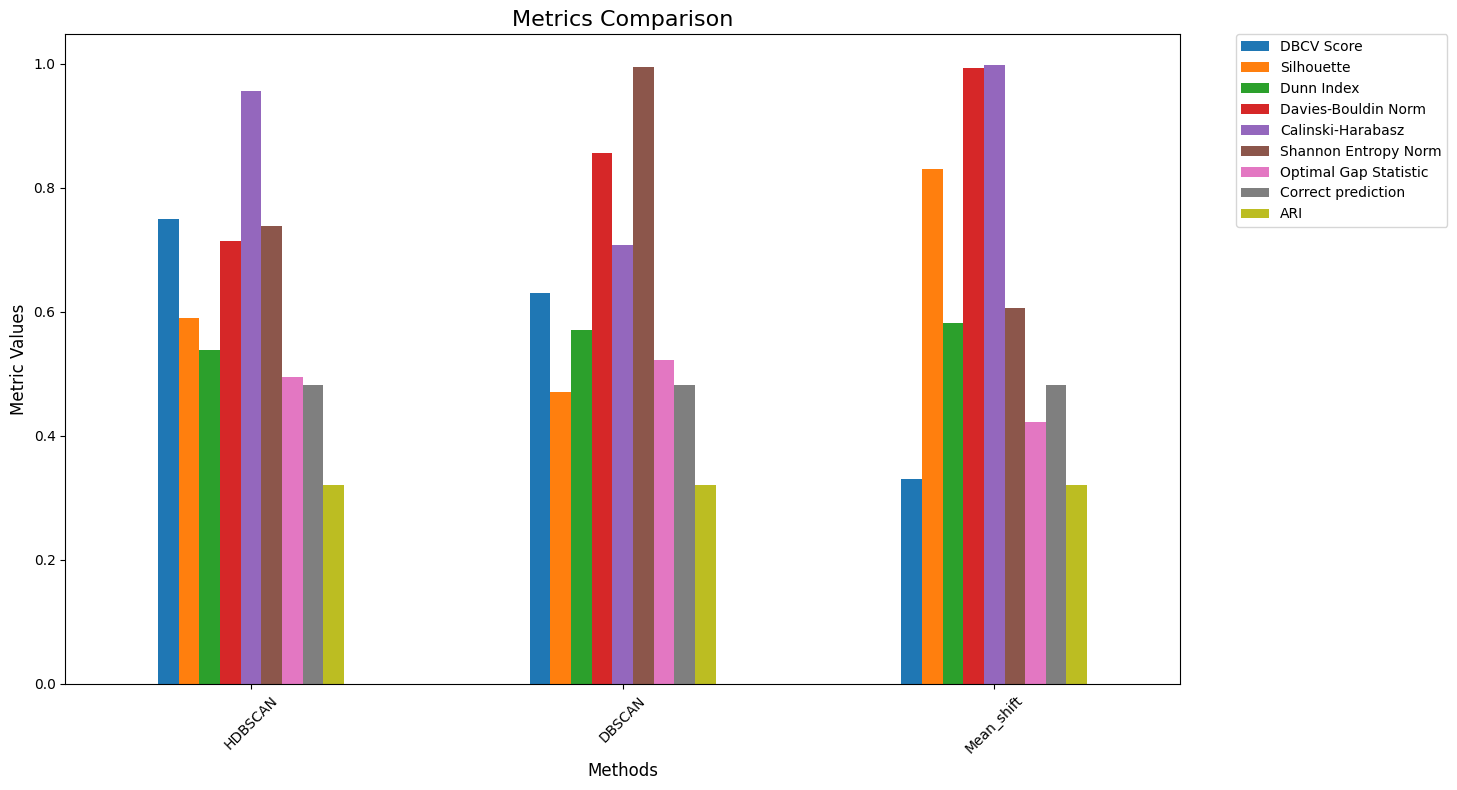

In [114]:
df_metrics_neuroblastoma.set_index("Method", inplace=True)
plt.figure(figsize=(10, 8))
ax = df_metrics_neuroblastoma.plot(kind='bar', figsize=(12, 8))
plt.title('Metrics Comparison', fontsize=16)
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Metric Values', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostriamo il grafico
plt.show()

#**Diabetes**

In [115]:
diabetes = diabetes.dropna(thresh=neuroblastoma.shape[1] - 2)
numerical_features = diabetes.columns
scaler_minmax = MinMaxScaler()
diabetes_scaled = diabetes.copy()
diabetes_scaled[numerical_features] = scaler_minmax.fit_transform(diabetes[numerical_features])
diabetes_scaled.reset_index(drop=True, inplace=True)
diabetes_scaled.drop_duplicates(inplace=True)
df_metrics_diabetes = pd.DataFrame()
diabetes_scaled

age  duration.of.diabetes  body_mass_index       TDD     basal  \
0   0.370370              0.233333           0.1875  0.421053  0.209302   
1   0.370370              0.500000           0.4375  0.726316  0.531561   
2   0.407407              0.533333           0.1250  0.175940  0.348837   
3   0.148148              0.233333           0.1250  0.666165  0.468439   
4   0.666667              0.833333           0.8750  0.681203  0.707641   
..       ...                   ...              ...       ...       ...   
62  0.555556              0.600000           0.0000  0.470677  1.000000   
63  0.962963              0.800000           0.3750  0.184962  0.232558   
64  0.000000              0.166667           0.4375  0.846617  0.860465   
65  0.555556              0.633333           0.3125  0.275188  0.531561   
66  0.592593              0.533333           0.2500  0.293233  0.548173   

       bolus     HbA1c      eGFR  perc.body.fat  adiponectin  \
0   0.529101  0.214286  0.422018       0.971429     0.375000   
1   0.716049  0.482143  0.546527       0.980952     0.225694   
2   0.167549  0.125000  0.448231       0.971429     0.437500   
3   0.679012  0.375000  0.550459       0.971429     0.107639   
4   0.567901  0.446429  0.758847       0.990476     0.357639   
..       ...       ...       ...            ...          ...   
62  0.167549  0.732143  0.000000       0.971429     0.381944   
63  0.239859  0.321429  0.342071       0.980952     0.288194   
64  0.682540  0.500000  0.832241       0.971429     0.343750   
65  0.186949  0.303571  0.563565       0.971429     0.253472   
66  0.199295  0.089286  0.568807       0.971429     0.579861   

    free.testosterone       SMI  grip.strength  knee.extension.strength  \
0            0.022599  0.388889       0.358090                 0.312500   
1            0.531073  0.555556       0.607427                 0.542763   
2            0.039548  0.166667       0.042440                 0.312500   
3            0.050847  0.277778       0.381963                 0.299342   
4            0.542373  0.777778       0.671088                 0.500000   
..                ...       ...            ...                      ...   
62           0.016949  0.111111       0.209549                 0.542763   
63           0.276836  0.500000       0.233422                 0.154605   
64           0.954802  0.694444       0.612732                 0.572368   
65           0.429379  0.694444       1.000000                 0.674342   
66           0.220339  0.444444       0.026525                 0.161184   

    gait.speed      ucOC        OC  weight_kg  insulin_regimen_binary  \
0     0.000000  1.000000  1.000000   0.139482                     0.0   
1     0.583333  0.188172  0.254630   0.603659                     1.0   
2     0.333333  0.080645  0.101852   0.142683                     0.0   
3     0.500000  0.161290  0.187500   0.054878                     1.0   
4     0.416667  0.107527  0.134259   1.000000                     0.0   
..         ...       ...       ...        ...                     ...   
62    0.750000  0.838710  0.879630   0.000000                     1.0   
63    0.583333  0.086022  0.150463   0.164634                     1.0   
64    0.583333  0.424731  0.479167   0.457317                     1.0   
65    0.750000  0.231183  0.245370   0.384146                     1.0   
66    0.500000  0.000000  0.016204   0.213415                     0.0   

    sex_0man_1woman  
0               1.0  
1               0.0  
2               1.0  
3               1.0  
4               0.0  
..              ...  
62              1.0  
63              0.0  
64              0.0  
65              0.0  
66              1.0  

[67 rows x 20 columns]

**HSBSCAN**

In [116]:
min_size, epsilon= best_params_hdbscan(diabetes_scaled)
hdbscan_cluster= hdbscan.HDBSCAN(min_cluster_size=min_size, cluster_selection_epsilon=epsilon)
labels = hdbscan_cluster.fit_predict(diabetes_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(diabetes_scaled, labels)
diabetes_scaled['HDBSCAN_pred'] = labels
methods = 'HDBSCAN'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_diabetes = pd.concat([df_metrics_diabetes, metrics_df], ignore_index=True)


min_cluster_size: 6, cluster_selection_epsilon: 0.01


**DBSCAN**

In [117]:
min_sample, eps = best_params_dbscan(diabetes_scaled)
dbscan = DBSCAN(min_samples=min_sample, eps=eps)
labels = dbscan.fit_predict(diabetes_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(diabetes_scaled, labels)
diabetes_scaled['DBSCAN_pred'] = labels

methods = 'DBSCAN'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_diabetes = pd.concat([df_metrics_diabetes, metrics_df], ignore_index=True)

min_cluster_size: 3, cluster_selection_epsilon: 0.5


**Mean_Shift**

In [118]:
band = best_params_mean_shift(diabetes_scaled)
mean_shift = MeanShift(bandwidth=band)
labels = mean_shift.fit_predict(diabetes_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(diabetes_scaled, labels)
diabetes_scaled['Mean_shift_pred'] = labels

methods = 'Mean_shift'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_diabetes = pd.concat([df_metrics_diabetes, metrics_df], ignore_index=True)
df_metrics_diabetes

Errore calcolando DBCV per banda 0.608: zero-size array to reduction operation maximum which has no identity
Errore calcolando DBCV per banda 1.337: zero-size array to reduction operation maximum which has no identity
Banda 1.8227301072088797 genera solo un cluster. Ignorato.
Banda 2.065760788170064 genera solo un cluster. Ignorato.
Banda 2.308791469131248 genera solo un cluster. Ignorato.
Best bandwidth: 0.851


Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN        0.51        0.26    0.288354                 0.51   
1      DBSCAN        0.09        0.01    0.134061                 0.84   
2  Mean_shift        0.57        0.27    0.570604                 1.72   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  
0              20.11                  0.10                   1.23  
1               6.12                  0.57                   1.24  
2              18.54                  1.17                   1.26

**Cluster Analysis**

In [119]:
cluster_similarity = similar_cluster(diabetes_scaled)
cluster_similarity

[15  2  1  0  8 12  7  5  9  3  6 13 10 14 11  4 16]
[-1  0]
[-1  0  2  1]


Mean_shift  DBSCAN  HDBSCAN  Percentuale
27            0      -1        1    32.835821
18            1      -1        2    23.880597
9             2      -1        0    14.925373
78            3       0        2     8.955224
0            15      -1       -1     1.492537
..          ...     ...      ...          ...
42           12      -1        2     0.000000
40           12      -1       -1     0.000000
39            8       0        1     0.000000
38            8       0        2     0.000000
135          16       0        1     0.000000

[136 rows x 4 columns]

In [120]:
diabetes_scaled["DBSCAN_pred"] = diabetes_scaled["DBSCAN_pred"].astype(object)
diabetes_scaled["HDBSCAN_pred"] = diabetes_scaled["HDBSCAN_pred"].astype(object)
diabetes_scaled["Mean_shift_pred"] = diabetes_scaled["Mean_shift_pred"].astype(object)

diabetes_scaled.loc[diabetes_scaled["DBSCAN_pred"] == -1, "DBSCAN_pred"] = 'A'
diabetes_scaled.loc[diabetes_scaled["HDBSCAN_pred"] == 1, "HDBSCAN_pred"] = 'A'
diabetes_scaled.loc[diabetes_scaled["Mean_shift_pred"] == 0, "Mean_shift_pred"] = 'A'

diabetes_scaled.loc[diabetes_scaled["DBSCAN_pred"] == 0, "DBSCAN_pred"] = 'B'
diabetes_scaled.loc[diabetes_scaled["HDBSCAN_pred"] == 2, "HDBSCAN_pred"] = 'B'
diabetes_scaled.loc[diabetes_scaled["Mean_shift_pred"] == 3, "Mean_shift_pred"] = 'B'


diabetes_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]] = (
    diabetes_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]]
    .replace({'A': 0, 'B': 1})
    .astype(int)
)

same_value_count = (diabetes_scaled["HDBSCAN_pred"] == diabetes_scaled["DBSCAN_pred"]) & \
                   (diabetes_scaled["DBSCAN_pred"] == diabetes_scaled["Mean_shift_pred"])

total_same_value = same_value_count.sum()
total_rows = len(diabetes_scaled)

percentage_same_value = (total_same_value / total_rows) * 100
print("Totale delle righe con lo stesso valore:", total_same_value)
print("Percentuale rispetto al totale:", round(percentage_same_value,2), "%")
percentage_same_value = round((percentage_same_value / 100),3)
ari = compute_ari(diabetes_scaled)
df_metrics_diabetes['Correct prediction'] = percentage_same_value
df_metrics_diabetes['ARI'] = ari
df_metrics_diabetes

Totale delle righe con lo stesso valore: 28
Percentuale rispetto al totale: 41.79 %


Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN        0.51        0.26    0.288354                 0.51   
1      DBSCAN        0.09        0.01    0.134061                 0.84   
2  Mean_shift        0.57        0.27    0.570604                 1.72   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  \
0              20.11                  0.10                   1.23   
1               6.12                  0.57                   1.24   
2              18.54                  1.17                   1.26   

   Correct prediction       ARI  
0               0.418  0.321206  
1               0.418  0.321206  
2               0.418  0.321206

In [121]:
df_metrics_diabetes["Silhouette"] = (df_metrics_diabetes["Silhouette"] + 1) / 2
df_metrics_diabetes["DBCV Score"] = (df_metrics_diabetes["DBCV Score"] + 1) / 2
df_metrics_diabetes["Dunn Index"] = (erf(df_metrics_diabetes["Dunn Index"]) + 1) / 2
df_metrics_diabetes["Davies-Bouldin Norm"] = (erf(df_metrics_diabetes["Davies-Bouldin Norm"]) + 1) / 2
df_metrics_diabetes["Calinski-Harabasz"] = 1 - (1 / df_metrics_diabetes["Calinski-Harabasz"])
df_metrics_diabetes["Shannon Entropy Norm"] = (erf(df_metrics_diabetes["Shannon Entropy Norm"]) + 1) / 2
df_metrics_diabetes["Optimal Gap Statistic"] = (erf(df_metrics_diabetes["Optimal Gap Statistic"]) + 1) / 2
df_metrics_diabetes

Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN       0.755       0.630    0.658288             0.764622   
1      DBSCAN       0.545       0.505    0.575185             0.882571   
2  Mean_shift       0.785       0.635    0.790154             0.992501   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  \
0           0.950273              0.556231               0.959025   
1           0.836601              0.789908               0.960253   
2           0.946063              0.951000               0.962618   

   Correct prediction       ARI  
0               0.418  0.321206  
1               0.418  0.321206  
2               0.418  0.321206

<Figure size 1000x800 with 0 Axes>

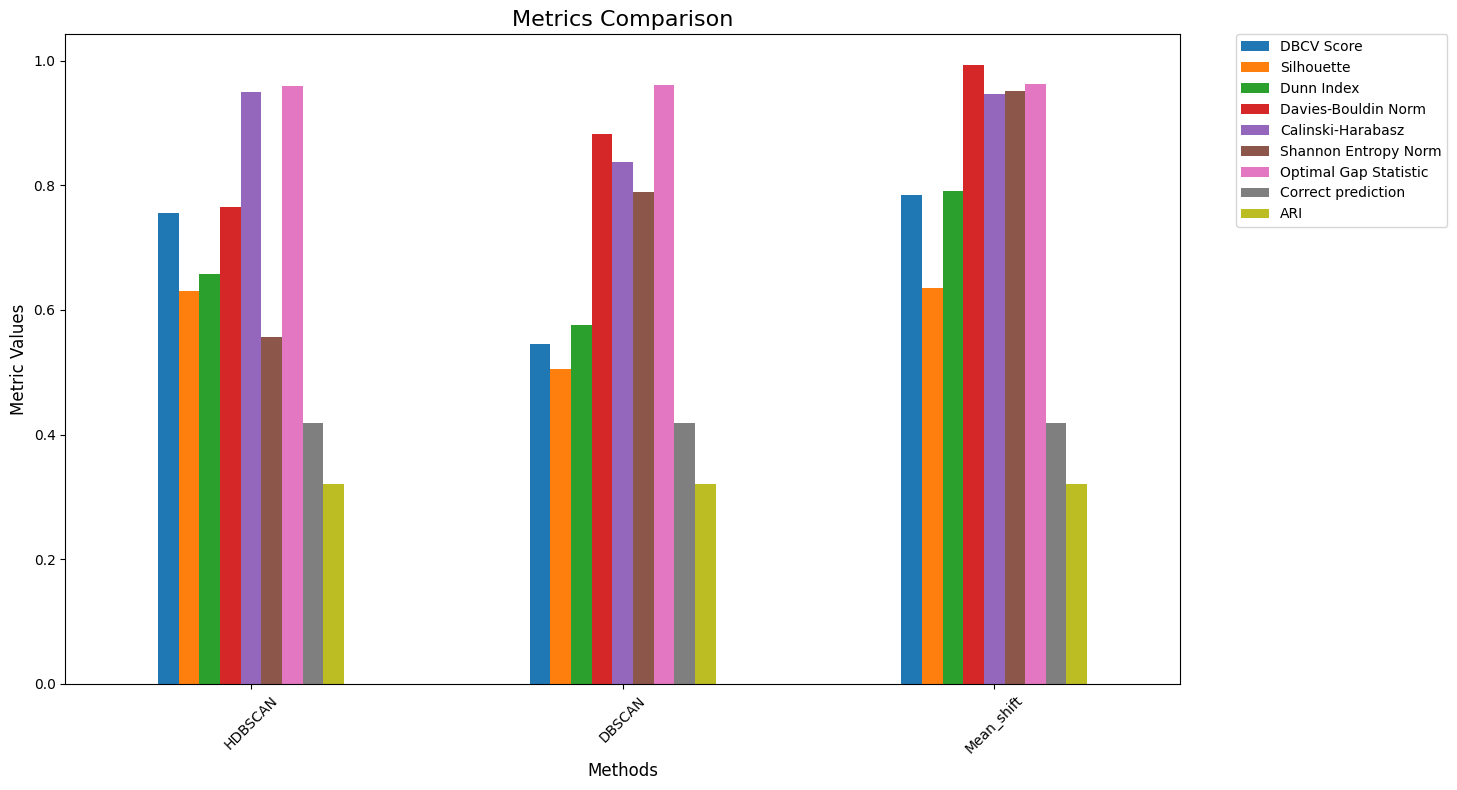

In [122]:
df_metrics_diabetes.set_index("Method", inplace=True)
plt.figure(figsize=(10, 8))
ax = df_metrics_diabetes.plot(kind='bar', figsize=(12, 8))
plt.title('Metrics Comparison', fontsize=16)
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Metric Values', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostriamo il grafico
plt.show()

#**Sepsis**

In [123]:
sepsis = sepsis.dropna(thresh=neuroblastoma.shape[1] - 2)
numerical_features = sepsis.columns
scaler_minmax = MinMaxScaler()
sepsis_scaled = sepsis.copy()
sepsis_scaled[numerical_features] = scaler_minmax.fit_transform(sepsis_scaled[numerical_features])
sepsis_scaled.reset_index(drop=True, inplace=True)
sepsis_scaled.drop_duplicates(inplace=True)
df_metrics_sepsis = pd.DataFrame()
sepsis_scaled

Age  sex_woman  diagnosis_0EC_1M_2_AC  APACHE II    SOFA       CRP  \
0     0.061728        0.0                    1.0   0.291667  0.0000  0.000384   
1     0.432099        0.0                    1.0   0.208333  0.1875  0.172911   
2     0.802469        0.0                    1.0   0.166667  0.2500  0.228818   
3     0.209877        0.0                    1.0   0.062500  0.0000  0.141787   
4     0.839506        0.0                    1.0   0.354167  0.1250  0.095485   
...        ...        ...                    ...        ...     ...       ...   
1252  0.814815        1.0                    0.5   0.375000  0.1875  0.005764   
1253  0.148148        1.0                    0.5   0.062500  0.0000  0.001921   
1254  0.543210        1.0                    0.5   0.395833  0.3750  0.086455   
1255  0.160494        1.0                    0.5   0.333333  0.3125  0.038425   
1256  0.395062        0.0                    0.5   0.104167  0.0625  0.125456   

          WBCC      NeuC      LymC       EOC      NLCR      PLTC       MPV  \
0     0.195721  0.168191  0.174444  0.097561  0.015703  0.195730  0.093458   
1     0.367670  0.319682  0.088299  0.000000  0.061385  0.319098  0.100935   
2     0.237718  0.193042  0.102656  0.000000  0.031644  0.103203  0.085981   
3     0.140650  0.114712  0.134243  0.048780  0.014038  0.288256  0.073832   
4     0.198891  0.189463  0.111271  0.000000  0.028551  0.144721  0.110280   
...        ...       ...       ...       ...       ...       ...       ...   
1252  0.121038  0.100596  0.115578  0.073171  0.014276  0.158956  0.090654   
1253  0.144414  0.064215  0.497487  0.073171  0.001190  0.304864  0.096262   
1254  0.077060  0.066203  0.043790  0.048780  0.025934  0.209964  0.080374   
1255  0.154517  0.129026  0.108399  0.048780  0.019748  0.181495  0.084112   
1256  0.217512  0.192247  0.128500  0.000000  0.024982  0.213523  0.089720   

      Group   LOS-ICU  Mortality  
0       0.0  0.000000        0.0  
1       0.0  0.000000        0.0  
2       0.0  0.000000        0.0  
3       0.0  0.000000        0.0  
4       0.0  0.000000        0.0  
...     ...       ...        ...  
1252    0.0  0.052632        0.0  
1253    0.0  0.000000        0.0  
1254    0.0  0.147368        0.0  
1255    1.0  0.031579        0.0  
1256    0.0  0.000000        0.0  

[1257 rows x 16 columns]

**HSBSCAN**

In [124]:
min_size, epsilon= best_params_hdbscan(sepsis_scaled)
hdbscan_cluster= hdbscan.HDBSCAN(min_cluster_size=min_size, cluster_selection_epsilon=epsilon)
labels = hdbscan_cluster.fit_predict(sepsis_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(sepsis_scaled, labels)
sepsis_scaled['HDBSCAN_pred'] = labels
methods = 'HDBSCAN'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_sepsis = pd.concat([df_metrics_sepsis, metrics_df], ignore_index=True)


min_cluster_size: 6, cluster_selection_epsilon: 0.01


**DBSCAN**

In [125]:
min_sample, eps = best_params_dbscan(sepsis_scaled)
dbscan = DBSCAN(min_samples=min_sample, eps=eps)
labels = dbscan.fit_predict(sepsis_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(sepsis_scaled, labels)
sepsis_scaled['DBSCAN_pred'] = labels

methods = 'DBSCAN'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_sepsis = pd.concat([df_metrics_sepsis, metrics_df], ignore_index=True)

min_cluster_size: 3, cluster_selection_epsilon: 0.5


**Mean_Shift**

In [126]:
band = best_params_mean_shift(sepsis_scaled)
mean_shift = MeanShift(bandwidth=band)
labels = mean_shift.fit_predict(sepsis_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(sepsis_scaled, labels)
sepsis_scaled['Mean_shift_pred'] = labels

methods = 'Mean_shift'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_sepsis = pd.concat([df_metrics_sepsis, metrics_df], ignore_index=True)
df_metrics_sepsis

Errore calcolando DBCV per banda 0.385: zero-size array to reduction operation maximum which has no identity
Errore calcolando DBCV per banda 1.156: zero-size array to reduction operation maximum which has no identity
Best bandwidth: 1.927


Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN        0.40        0.31    0.096830                 0.64   
1      DBSCAN        0.73        0.49    0.092722                 0.93   
2  Mean_shift        0.81        0.77    0.497859                 2.29   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  
0             286.31                  0.59                   1.82  
1            2369.34                  0.78                   1.77  
2            8008.74                  0.78                   1.53

**Cluster Analysis**

In [127]:
cluster_similarity = similar_cluster(sepsis_scaled)
cluster_similarity

[ 6 11 10 15 12  0  1  9  3  2  7 13  4  8 14  5]
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 14 13 15]
[-1  5  2  6  4  0 10 11  8  3  9 12  1  7]


Mean_shift  DBSCAN  HDBSCAN  Percentuale
1252           0       3       10    25.934765
1520           1       5        8    16.070008
2279           2       8       12    11.296738
2026           3       7        9     8.353222
3051           4      12        7     7.398568
...          ...     ...      ...          ...
1278           0       5        4     0.000000
1279           0       5        0     0.000000
1280           0       5       10     0.000000
1281           0       5       11     0.000000
3807           5      15        7     0.000000

[3808 rows x 4 columns]

In [128]:
sepsis_scaled["DBSCAN_pred"] = sepsis_scaled["DBSCAN_pred"].astype(object)
sepsis_scaled["HDBSCAN_pred"] = sepsis_scaled["HDBSCAN_pred"].astype(object)
sepsis_scaled["Mean_shift_pred"] = sepsis_scaled["Mean_shift_pred"].astype(object)

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 3, "DBSCAN_pred"] = 'A'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 10, "HDBSCAN_pred"] = 'A'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 0, "Mean_shift_pred"] = 'A'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 5, "DBSCAN_pred"] = 'B'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 8, "HDBSCAN_pred"] = 'B'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 1, "Mean_shift_pred"] = 'B'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 8, "DBSCAN_pred"] = 'C'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 12, "HDBSCAN_pred"] = 'C'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 2, "Mean_shift_pred"] = 'C'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 7, "DBSCAN_pred"] = 'D'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 9, "HDBSCAN_pred"] = 'D'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 3, "Mean_shift_pred"] = 'D'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 12, "DBSCAN_pred"] = 'E'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 7, "HDBSCAN_pred"] = 'E'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 4, "Mean_shift_pred"] = 'E'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 15, "DBSCAN_pred"] = 'F'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 4, "HDBSCAN_pred"] = 'F'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 5, "Mean_shift_pred"] = 'F'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == -1, "DBSCAN_pred"] = 'G'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == -1, "HDBSCAN_pred"] = 'G'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 6, "Mean_shift_pred"] = 'G'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 10, "DBSCAN_pred"] = 'H'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 1, "HDBSCAN_pred"] = 'H'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 7, "Mean_shift_pred"] = 'H'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 14, "DBSCAN_pred"] = 'I'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 0, "HDBSCAN_pred"] = 'I'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 8, "Mean_shift_pred"] = 'I'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 6, "DBSCAN_pred"] = 'J'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 4, "HDBSCAN_pred"] = 'J'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 9, "Mean_shift_pred"] = 'J'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 0, "DBSCAN_pred"] = 'K'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 5, "HDBSCAN_pred"] = 'K'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 11, "Mean_shift_pred"] = 'K'

sepsis_scaled.loc[sepsis_scaled["DBSCAN_pred"] == 13, "DBSCAN_pred"] = 'L'
sepsis_scaled.loc[sepsis_scaled["HDBSCAN_pred"] == 3, "HDBSCAN_pred"] = 'L'
sepsis_scaled.loc[sepsis_scaled["Mean_shift_pred"] == 14, "Mean_shift_pred"] = 'L'

sepsis_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]] = (
    sepsis_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]]
    .replace({'A': 0, 'B': 1, 'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,
              'J': 9,'K': 10,'L': 11,})
    .astype(int)
)

same_value_count = (sepsis_scaled["HDBSCAN_pred"] == sepsis_scaled["DBSCAN_pred"]) & \
                   (sepsis_scaled["DBSCAN_pred"] == sepsis_scaled["Mean_shift_pred"])

total_same_value = same_value_count.sum()
total_rows = len(sepsis_scaled)

percentage_same_value = (total_same_value / total_rows) * 100
print("Totale delle righe con lo stesso valore:", total_same_value)
print("Percentuale rispetto al totale:", round(percentage_same_value,2), "%")
percentage_same_value = round((percentage_same_value / 100),3)
ari = compute_ari(sepsis_scaled)
df_metrics_sepsis['Correct prediction'] = percentage_same_value
df_metrics_sepsis['ARI'] = ari
df_metrics_sepsis

Totale delle righe con lo stesso valore: 1117
Percentuale rispetto al totale: 88.86 %


Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN        0.40        0.31    0.096830                 0.64   
1      DBSCAN        0.73        0.49    0.092722                 0.93   
2  Mean_shift        0.81        0.77    0.497859                 2.29   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  \
0             286.31                  0.59                   1.82   
1            2369.34                  0.78                   1.77   
2            8008.74                  0.78                   1.53   

   Correct prediction       ARI  
0               0.889  0.321206  
1               0.889  0.321206  
2               0.889  0.321206

In [129]:
df_metrics_sepsis["Silhouette"] = (df_metrics_sepsis["Silhouette"] + 1) / 2
df_metrics_sepsis["DBCV Score"] = (df_metrics_sepsis["DBCV Score"] + 1) / 2
df_metrics_sepsis["Dunn Index"] = (erf(df_metrics_sepsis["Dunn Index"]) + 1) / 2
df_metrics_sepsis["Davies-Bouldin Norm"] = (erf(df_metrics_sepsis["Davies-Bouldin Norm"]) + 1) / 2
df_metrics_sepsis["Calinski-Harabasz"] = 1 - (1 / df_metrics_sepsis["Calinski-Harabasz"])
df_metrics_sepsis["Shannon Entropy Norm"] = (erf(df_metrics_sepsis["Shannon Entropy Norm"]) + 1) / 2
df_metrics_sepsis["Optimal Gap Statistic"] = (erf(df_metrics_sepsis["Optimal Gap Statistic"]) + 1) / 2
df_metrics_sepsis

Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN       0.700       0.655    0.554460             0.817293   
1      DBSCAN       0.865       0.745    0.552163             0.905782   
2  Mean_shift       0.905       0.885    0.759308             0.999399   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  \
0           0.996507              0.797968               0.994972   
1           0.999578              0.865005               0.993845   
2           0.999875              0.865005               0.984758   

   Correct prediction       ARI  
0               0.889  0.321206  
1               0.889  0.321206  
2               0.889  0.321206

<Figure size 1000x800 with 0 Axes>

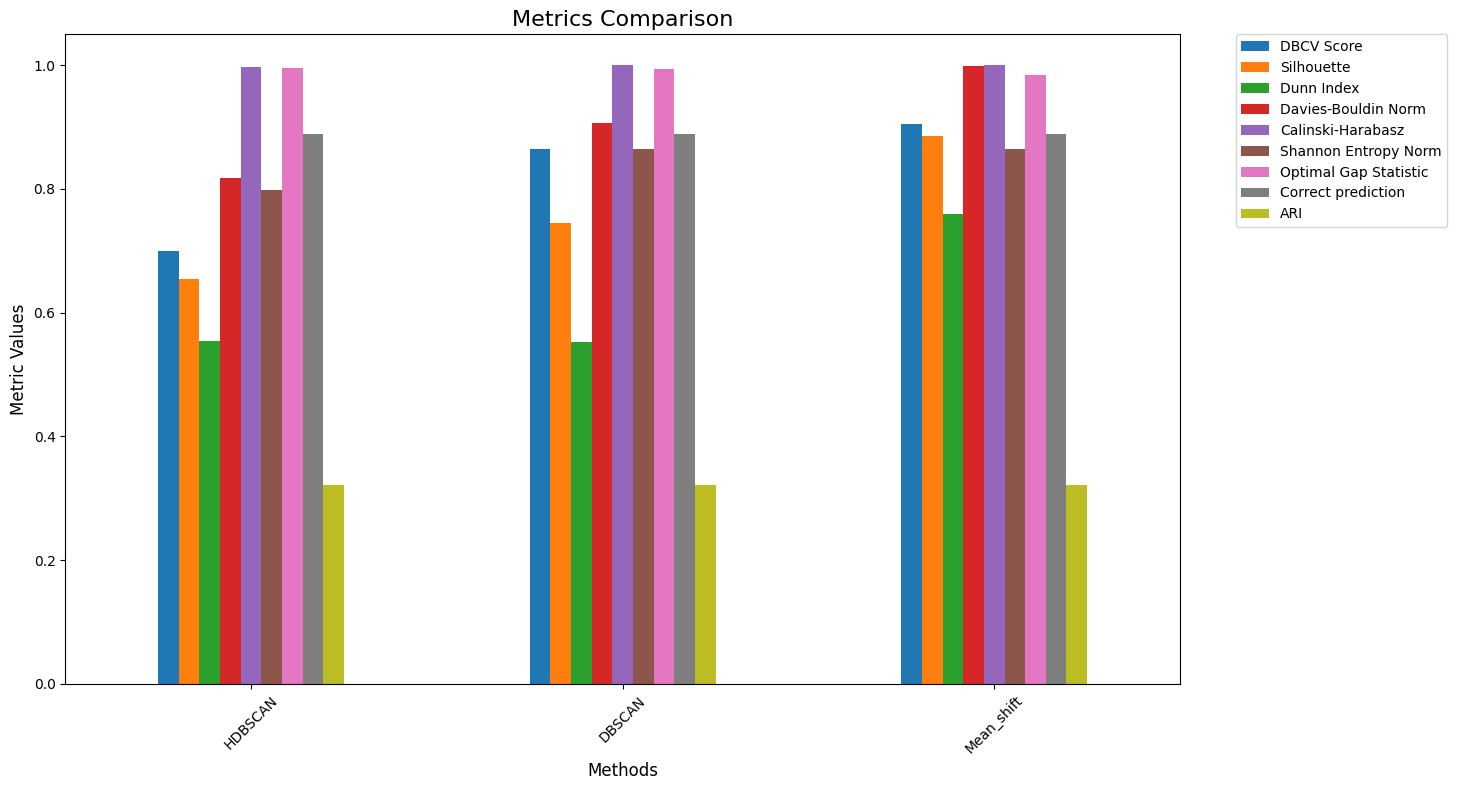

In [130]:
df_metrics_sepsis.set_index("Method", inplace=True)
plt.figure(figsize=(10, 8))
ax = df_metrics_sepsis.plot(kind='bar', figsize=(12, 8))
plt.title('Metrics Comparison', fontsize=16)
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Metric Values', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostriamo il grafico
plt.show()

#**Heart failure**

In [162]:
heart_failure = heart_failure.dropna(thresh=neuroblastoma.shape[1] - 2)
numerical_features = heart_failure.columns
scaler_minmax = MinMaxScaler()
heart_failure_scaled = heart_failure.copy()
heart_failure_scaled[numerical_features] = scaler_minmax.fit_transform(heart_failure_scaled[numerical_features])
heart_failure_scaled.reset_index(drop=True, inplace=True)
heart_failure_scaled.drop_duplicates(inplace=True)
df_metrics_heart_failure = pd.DataFrame()
heart_failure_scaled

Age (years)  Male (1=Yes, 0=No)  PHQ-9  Systolic BP (mm Hg)  \
0       0.923077                 0.0   0.04             0.540000   
1       1.000000                 1.0   0.32             0.340000   
2       0.794872                 1.0   0.16             0.380000   
3       0.833333                 1.0   0.16             0.326667   
4       0.807692                 1.0   0.12             0.520000   
..           ...                 ...    ...                  ...   
420     0.371795                 1.0   0.12             0.526667   
421     0.666667                 1.0   0.44             0.606667   
422     0.538462                 1.0   0.68             0.473333   
423     0.346154                 1.0   0.16             0.720000   
424     0.423077                 0.0   1.00             0.466667   

     Estimated glomerular filtration rate  Ejection fraction (%)  \
0                                0.253775               0.695035   
1                                0.169680               0.758865   
2                                0.325089               0.758865   
3                                0.360210               0.297872   
4                                0.324216               0.659574   
..                                    ...                    ...   
420                              0.457364               0.539007   
421                              0.148905               0.659574   
422                              0.673790               0.225532   
423                              0.331913               0.075603   
424                              0.218280               0.617021   

     Serum sodium (mmol/l)  Blood urea nitrogen (mg/dl)  \
0                 0.500000                     0.218487   
1                 0.636364                     0.630252   
2                 0.681818                     0.235294   
3                 0.681818                     0.394958   
4                 0.500000                     0.268908   
..                     ...                          ...   
420               0.500000                     0.226891   
421               0.590909                     0.352941   
422               0.181818                     0.142857   
423               0.636364                     0.285714   
424               0.681818                     0.647059   

     Etiology HF(1=Yes, 0=No)  Prior diabetes mellitus  \
0                         1.0                      1.0   
1                         1.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      1.0   
4                         0.0                      1.0   
..                        ...                      ...   
420                       1.0                      1.0   
421                       0.0                      0.0   
422                       0.0                      1.0   
423                       0.0                      0.0   
424                       0.0                      1.0   

     Elevated level of BNP/NT-BNP (1=Yes, 0=No)  Time from HF to Death (days)  \
0                                           1.0                      0.929655   
1                                           1.0                      0.095172   
2                                           1.0                      1.000000   
3                                           1.0                      1.000000   
4                                           1.0                      1.000000   
..                                          ...                           ...   
420                                         1.0                      1.000000   
421                                         1.0                      1.000000   
422                                         1.0                      0.459310   
423                                         1.0                      1.000000   
424                                         1.0                      0.950

**HSBSCAN**

In [163]:
min_size, epsilon= best_params_hdbscan(heart_failure_scaled)
hdbscan_cluster= hdbscan.HDBSCAN(min_cluster_size=min_size, cluster_selection_epsilon=epsilon)
labels = hdbscan_cluster.fit_predict(heart_failure_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(heart_failure_scaled, labels)
heart_failure_scaled['HDBSCAN_pred'] = labels
methods = 'HDBSCAN'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_heart_failure = pd.concat([df_metrics_heart_failure, metrics_df], ignore_index=True)


min_cluster_size: 5, cluster_selection_epsilon: 0.01


**DBSCAN**

In [164]:
min_sample, eps = best_params_dbscan(heart_failure_scaled)
dbscan = DBSCAN(min_samples=min_sample, eps=eps)
labels = dbscan.fit_predict(heart_failure_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(heart_failure_scaled, labels)
heart_failure_scaled['DBSCAN_pred'] = labels

methods = 'DBSCAN'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_heart_failure = pd.concat([df_metrics_heart_failure, metrics_df], ignore_index=True)

min_cluster_size: 5, cluster_selection_epsilon: 0.5


**Mean_Shift**

In [165]:
band = best_params_mean_shift(heart_failure_scaled)
mean_shift = MeanShift(bandwidth=band)
labels = mean_shift.fit_predict(heart_failure_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(heart_failure_scaled, labels)
heart_failure_scaled['Mean_shift_pred'] = labels

methods = 'Mean_shift'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_heart_failure = pd.concat([df_metrics_heart_failure, metrics_df], ignore_index=True)
df_metrics_heart_failure

Errore calcolando DBCV per banda 0.601: zero-size array to reduction operation maximum which has no identity
Banda 11.42578647999099 genera solo un cluster. Ignorato.
Best bandwidth: 1.804


Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN        0.56        0.27    0.163598                 0.75   
1      DBSCAN        0.48       -0.01    0.014646                 0.61   
2  Mean_shift        0.59        0.65    0.473517                 2.45   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  
0              31.11                  0.43                   0.46  
1              39.59                  1.18                   0.25  
2            1715.49                  0.60                  -0.68

**Cluster Analysis**

In [166]:
cluster_similarity = similar_cluster(heart_failure_scaled)
cluster_similarity

[ 0  1 12  2 21  3 20  8 10 18 15  5 19 27 13  7  6 14 16  9 24  4 26 25
 23 22 17 11 28 29]
[-1  0  1 16  4 17  2  3 15  5  6  7  8  9 10 18 11 12 13 14]
[-1 14  6  1  3 15 23 12 17 21  5 10 13  2 18 24  4  9 19  8  0 16 22 20
  7 11]


Mean_shift  DBSCAN  HDBSCAN  Percentuale
0               0      -1       -1    20.000000
547             1       0       14     5.882353
2709            3       4       15     5.647059
11357           4      11       16     4.941176
5939            5      15       10     4.235294
...           ...     ...      ...          ...
5213           15      -1        2     0.000000
5214           15      -1       18     0.000000
5215           15      -1       24     0.000000
5216           15      -1        4     0.000000
15599          29      14       11     0.000000

[15600 rows x 4 columns]

In [167]:
heart_failure_scaled["DBSCAN_pred"] = heart_failure_scaled["DBSCAN_pred"].astype(object)
heart_failure_scaled["HDBSCAN_pred"] = heart_failure_scaled["HDBSCAN_pred"].astype(object)
heart_failure_scaled["Mean_shift_pred"] = heart_failure_scaled["Mean_shift_pred"].astype(object)

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == -1, "DBSCAN_pred"] = 'A'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == -1, "HDBSCAN_pred"] = 'A'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 0, "Mean_shift_pred"] = 'A'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 0, "DBSCAN_pred"] = 'B'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 14, "HDBSCAN_pred"] = 'B'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 1, "Mean_shift_pred"] = 'B'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 4, "DBSCAN_pred"] = 'C'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 15, "HDBSCAN_pred"] = 'C'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 3, "Mean_shift_pred"] = 'C'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 11, "DBSCAN_pred"] = 'D'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 16, "HDBSCAN_pred"] = 'D'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 4, "Mean_shift_pred"] = 'D'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 15, "DBSCAN_pred"] = 'E'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 10, "HDBSCAN_pred"] = 'E'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 5, "Mean_shift_pred"] = 'E'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 8, "DBSCAN_pred"] = 'F'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 19, "HDBSCAN_pred"] = 'F'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 6, "Mean_shift_pred"] = 'F'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 7, "DBSCAN_pred"] = 'G'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 9, "HDBSCAN_pred"] = 'G'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 7, "Mean_shift_pred"] = 'G'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 10, "DBSCAN_pred"] = 'H'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 24, "HDBSCAN_pred"] = 'H'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 9, "Mean_shift_pred"] = 'H'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 2, "DBSCAN_pred"] = 'I'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 17, "HDBSCAN_pred"] = 'I'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 10, "Mean_shift_pred"] = 'I'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 1, "DBSCAN_pred"] = 'J'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 6, "HDBSCAN_pred"] = 'J'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 12, "Mean_shift_pred"] = 'J'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 6, "DBSCAN_pred"] = 'K'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 4, "HDBSCAN_pred"] = 'K'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 13, "Mean_shift_pred"] = 'K'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 9, "DBSCAN_pred"] = 'L'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 21, "HDBSCAN_pred"] = 'L'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 16, "Mean_shift_pred"] = 'L'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 15, "DBSCAN_pred"] = 'M'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 18, "HDBSCAN_pred"] = 'M'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 19, "Mean_shift_pred"] = 'M'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 14, "DBSCAN_pred"] = 'N'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 20, "HDBSCAN_pred"] = 'N'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 23, "Mean_shift_pred"] = 'N'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 16, "DBSCAN_pred"] = 'O'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 3, "HDBSCAN_pred"] = 'O'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 21, "Mean_shift_pred"] = 'O'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 18, "DBSCAN_pred"] = 'P'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 8, "HDBSCAN_pred"] = 'P'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 24, "Mean_shift_pred"] = 'P'

heart_failure_scaled.loc[heart_failure_scaled["DBSCAN_pred"] == 12, "DBSCAN_pred"] = 'Q'
heart_failure_scaled.loc[heart_failure_scaled["HDBSCAN_pred"] == 22, "HDBSCAN_pred"] = 'Q'
heart_failure_scaled.loc[heart_failure_scaled["Mean_shift_pred"] == 26, "Mean_shift_pred"] = 'Q'


heart_failure_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]] = (
    heart_failure_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]]
    .replace({'A': 0, 'B': 1, 'C': 2,'D': 3,'E': 4,'F': 5,'G': 6,'H': 7,'I': 8,
              'J': 9,'K': 10,'L': 11,'M': 12,'N': 13,'O': 14,'P': 15,'Q':16})
    .astype(int)
)

same_value_count = (heart_failure_scaled["HDBSCAN_pred"] == heart_failure_scaled["DBSCAN_pred"]) & \
                   (heart_failure_scaled["DBSCAN_pred"] == heart_failure_scaled["Mean_shift_pred"])

total_same_value = same_value_count.sum()
total_rows = len(heart_failure_scaled)

percentage_same_value = (total_same_value / total_rows) * 100
print("Totale delle righe con lo stesso valore:", total_same_value)
print("Percentuale rispetto al totale:", round(percentage_same_value,2), "%")
percentage_same_value = round((percentage_same_value / 100),3)
ari = compute_ari(heart_failure_scaled)
df_metrics_heart_failure['Correct prediction'] = percentage_same_value
df_metrics_heart_failure['ARI'] = ari
df_metrics_heart_failure

Totale delle righe con lo stesso valore: 294
Percentuale rispetto al totale: 69.18 %


Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN        0.56        0.27    0.163598                 0.75   
1      DBSCAN        0.48       -0.01    0.014646                 0.61   
2  Mean_shift        0.59        0.65    0.473517                 2.45   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  \
0              31.11                  0.43                   0.46   
1              39.59                  1.18                   0.25   
2            1715.49                  0.60                  -0.68   

   Correct prediction       ARI  
0               0.692  0.321206  
1               0.692  0.321206  
2               0.692  0.321206

In [168]:
df_metrics_heart_failure["Silhouette"] = (df_metrics_heart_failure["Silhouette"] + 1) / 2
df_metrics_heart_failure["DBCV Score"] = (df_metrics_heart_failure["DBCV Score"] + 1) / 2
df_metrics_heart_failure["Dunn Index"] = (erf(df_metrics_heart_failure["Dunn Index"]) + 1) / 2
df_metrics_heart_failure["Davies-Bouldin Norm"] = (erf(df_metrics_heart_failure["Davies-Bouldin Norm"]) + 1) / 2
df_metrics_heart_failure["Calinski-Harabasz"] = 1 - (1 / df_metrics_heart_failure["Calinski-Harabasz"])
df_metrics_heart_failure["Shannon Entropy Norm"] = (erf(df_metrics_heart_failure["Shannon Entropy Norm"]) + 1) / 2
df_metrics_heart_failure["Optimal Gap Statistic"] = (erf(df_metrics_heart_failure["Optimal Gap Statistic"]) + 1) / 2
df_metrics_heart_failure

Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN       0.780       0.635    0.591483             0.855578   
1      DBSCAN       0.740       0.495    0.508262             0.805841   
2  Mean_shift       0.795       0.825    0.748461             0.999735   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  \
0           0.967856              0.728443               0.742328   
1           0.974741              0.952419               0.638163   
2           0.999417              0.801928               0.168109   

   Correct prediction       ARI  
0               0.692  0.321206  
1               0.692  0.321206  
2               0.692  0.321206

<Figure size 1000x800 with 0 Axes>

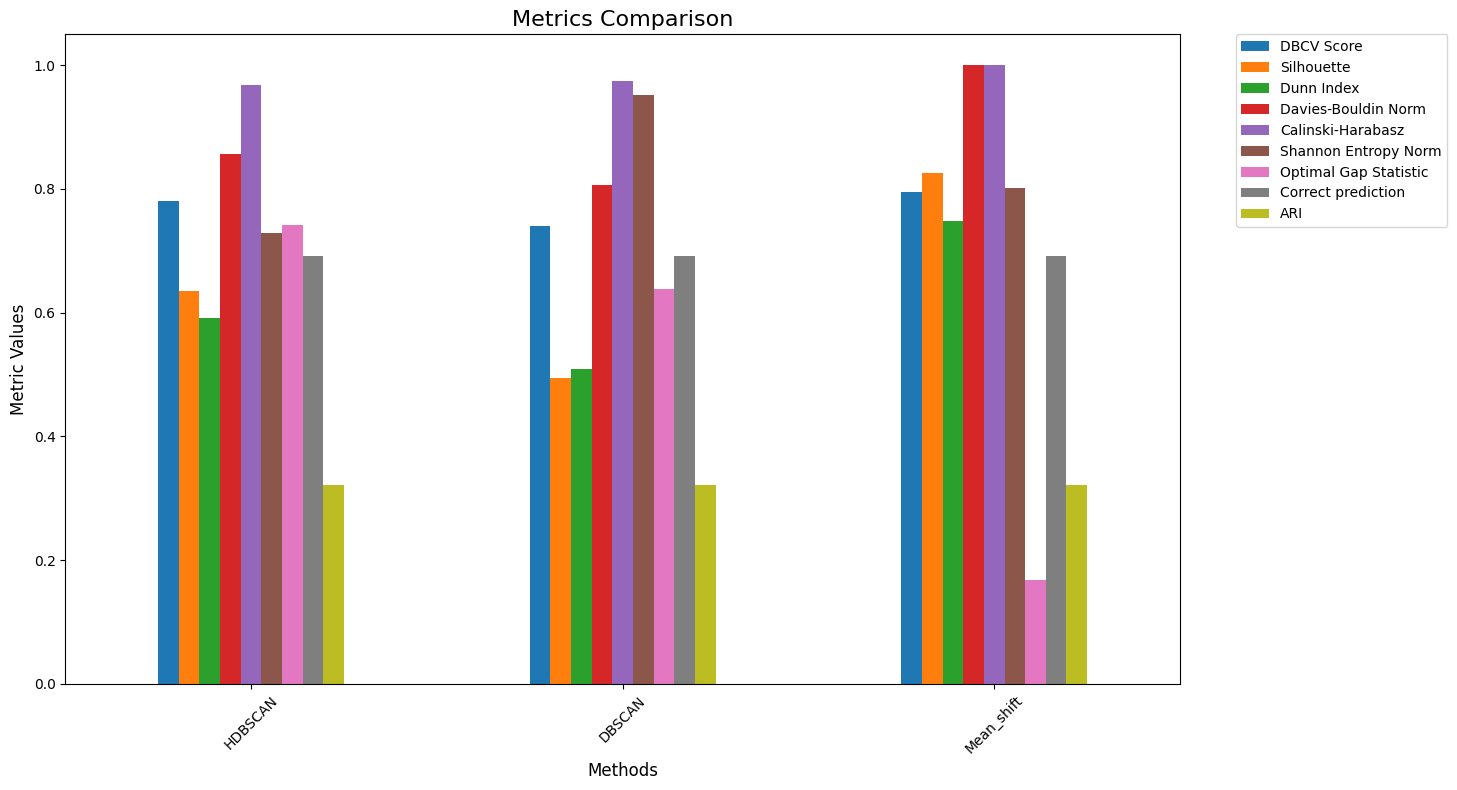

In [169]:
df_metrics_heart_failure.set_index("Method", inplace=True)
plt.figure(figsize=(10, 8))
ax = df_metrics_heart_failure.plot(kind='bar', figsize=(12, 8))
plt.title('Metrics Comparison', fontsize=16)
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Metric Values', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostriamo il grafico
plt.show()

#**Cardiac Arrest**

In [132]:
cardiac_arrest = cardiac_arrest.fillna(0)
numerical_features = cardiac_arrest.columns
scaler_minmax = MinMaxScaler()
cardiac_arrest_scaled = cardiac_arrest.copy()
cardiac_arrest_scaled[numerical_features] = scaler_minmax.fit_transform(cardiac_arrest_scaled[numerical_features])
cardiac_arrest_scaled.reset_index(drop=True, inplace=True)
cardiac_arrest_scaled.drop_duplicates(inplace=True)
df_metrics_cardiac_arrest = pd.DataFrame()
cardiac_arrest_scaled

Exitus  sex_woman  Age_years  Endotracheal_intubation  Functional_status  \
0       1.0        0.0   0.340206                      1.0           1.000000   
1       1.0        1.0   0.402062                      1.0           1.000000   
2       1.0        0.0   0.505155                      1.0           1.000000   
3       0.0        0.0   0.505155                      1.0           1.000000   
4       1.0        0.0   0.515464                      1.0           1.000000   
..      ...        ...        ...                      ...                ...   
417     1.0        0.0   0.742268                      1.0           1.000000   
418     1.0        0.0   0.649485                      1.0           1.000000   
419     1.0        0.0   0.711340                      1.0           0.666667   
420     1.0        0.0   0.670103                      1.0           1.000000   
421     1.0        0.0   0.536082                      1.0           1.000000   

     Asystole  Cardiac_arrest_at_home  Bystander  Time_min  Cardiogenic  
0         1.0                     1.0        1.0  0.102041          1.0  
1         1.0                     1.0        1.0  0.204082          1.0  
2         0.0                     0.0        1.0  0.469388          0.0  
3         0.0                     1.0        1.0  0.142857          1.0  
4         0.0                     0.0        1.0  0.306122          1.0  
..        ...                     ...        ...       ...          ...  
417       0.0                     1.0        1.0  0.183673          1.0  
418       1.0                     1.0        1.0  0.387755          1.0  
419       1.0                     0.0        0.0  0.183673          1.0  
420       0.0                     1.0        0.0  0.306122          0.0  
421       1.0                     1.0        0.0  0.102041          0.0  

[420 rows x 10 columns]

**HSBSCAN**

In [133]:
min_size, epsilon= best_params_hdbscan(cardiac_arrest_scaled)
hdbscan_cluster= hdbscan.HDBSCAN(min_cluster_size=min_size, cluster_selection_epsilon=epsilon)
labels = hdbscan_cluster.fit_predict(cardiac_arrest_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(cardiac_arrest_scaled, labels)
cardiac_arrest_scaled['HDBSCAN_pred'] = labels
methods = 'HDBSCAN'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_cardiac_arrest = pd.concat([df_metrics_cardiac_arrest, metrics_df], ignore_index=True)


min_cluster_size: 3, cluster_selection_epsilon: 0.01


**DBSCAN**

In [134]:
min_sample, eps = best_params_dbscan(cardiac_arrest_scaled)
dbscan = DBSCAN(min_samples=min_sample, eps=eps)
labels = dbscan.fit_predict(cardiac_arrest_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(cardiac_arrest_scaled, labels)
cardiac_arrest_scaled['DBSCAN_pred'] = labels

methods = 'DBSCAN'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_cardiac_arrest = pd.concat([df_metrics_cardiac_arrest, metrics_df], ignore_index=True)

min_cluster_size: 3, cluster_selection_epsilon: 0.5


**Mean_Shift**

In [135]:
band = best_params_mean_shift(cardiac_arrest_scaled)
mean_shift = MeanShift(bandwidth=band)
labels = mean_shift.fit_predict(cardiac_arrest_scaled)
dbcv_score, silhouette, dunn_index, davies_bouldin_norm, calinski_harabasz, shannon_entropy_norm, optimal_gap_statistic = compute_metrics(cardiac_arrest_scaled, labels)
cardiac_arrest_scaled['Mean_shift_pred'] = labels

methods = 'Mean_shift'
metrics_dict = {
    'Method': methods,
    'DBCV Score': dbcv_score,
    'Silhouette': silhouette,
    'Dunn Index': dunn_index,
    'Davies-Bouldin Norm': davies_bouldin_norm,
    'Calinski-Harabasz': calinski_harabasz,
    'Shannon Entropy Norm': shannon_entropy_norm,
    'Optimal Gap Statistic': optimal_gap_statistic
}

metrics_df = pd.DataFrame([metrics_dict])
df_metrics_cardiac_arrest = pd.concat([df_metrics_cardiac_arrest, metrics_df], ignore_index=True)
df_metrics_cardiac_arrest

Errore calcolando DBCV per banda 1.303: zero-size array to reduction operation maximum which has no identity
Errore calcolando DBCV per banda 3.909: zero-size array to reduction operation maximum which has no identity
Errore calcolando DBCV per banda 6.515: zero-size array to reduction operation maximum which has no identity
Banda 19.54508652955259 genera solo un cluster. Ignorato.
Banda 22.151098066826272 genera solo un cluster. Ignorato.
Banda 24.757109604099952 genera solo un cluster. Ignorato.
Best bandwidth: 11.727


Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN        0.73        0.46    0.034848                 0.81   
1      DBSCAN        0.81        0.57    0.014555                 1.21   
2  Mean_shift       -0.33        0.52    0.197982                 1.34   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  
0              27.13                  0.53                   0.01  
1             159.43                  0.53                  -0.72  
2             682.76                  0.10                  -2.20

**Cluster Analysis**

In [136]:
cluster_similarity = similar_cluster(cardiac_arrest_scaled)
cluster_similarity

[0 3 1 2]
[ 0  1  2 -1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 41 37 38 39 40 42]
[35 33 10 -1 23  2 31 26 27 20 28 24 34 11 13 21 14 19 17 36 30 15 32 29
 22 18  9  0  6  7 16  5 25 12  3  8  1  4]


Mean_shift  DBSCAN  HDBSCAN  Percentuale
1789           3      -1       -1    14.761905
0              0       0       35     6.666667
741            0      18       36     5.952381
312            0       7       27     5.000000
156            0       3       23     4.285714
...          ...     ...      ...          ...
2238           3      13        3     0.000000
2237           3      13       12     0.000000
2236           3      13       25     0.000000
2235           3      13        5     0.000000
6687           2      42        4     0.000000

[6688 rows x 4 columns]

In [137]:
cardiac_arrest_scaled["DBSCAN_pred"] = cardiac_arrest_scaled["DBSCAN_pred"].astype(object)
cardiac_arrest_scaled["HDBSCAN_pred"] = cardiac_arrest_scaled["HDBSCAN_pred"].astype(object)
cardiac_arrest_scaled["Mean_shift_pred"] = cardiac_arrest_scaled["Mean_shift_pred"].astype(object)

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == -1, "DBSCAN_pred"] = 'A'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == -1, "HDBSCAN_pred"] = 'A'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 3, "Mean_shift_pred"] = 'A'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == 0, "DBSCAN_pred"] = 'B'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == 35, "HDBSCAN_pred"] = 'B'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 0, "Mean_shift_pred"] = 'B'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == 19, "DBSCAN_pred"] = 'C'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == 30, "HDBSCAN_pred"] = 'C'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 1, "Mean_shift_pred"] = 'C'

cardiac_arrest_scaled.loc[cardiac_arrest_scaled["DBSCAN_pred"] == 31, "DBSCAN_pred"] = 'D'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["HDBSCAN_pred"] == 5, "HDBSCAN_pred"] = 'D'
cardiac_arrest_scaled.loc[cardiac_arrest_scaled["Mean_shift_pred"] == 2, "Mean_shift_pred"] = 'D'


cardiac_arrest_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]] = (
    cardiac_arrest_scaled[["DBSCAN_pred", "HDBSCAN_pred", "Mean_shift_pred"]]
    .replace({'A': 0, 'B': 1, 'C': 2, 'D': 3})
    .astype(int)
)

same_value_count = (cardiac_arrest_scaled["HDBSCAN_pred"] == cardiac_arrest_scaled["DBSCAN_pred"]) & \
                   (cardiac_arrest_scaled["DBSCAN_pred"] == cardiac_arrest_scaled["Mean_shift_pred"])

total_same_value = same_value_count.sum()
total_rows = len(cardiac_arrest_scaled)

percentage_same_value = (total_same_value / total_rows) * 100
print("Totale delle righe con lo stesso valore:", total_same_value)
print("Percentuale rispetto al totale:", round(percentage_same_value,2), "%")
percentage_same_value = round((percentage_same_value / 100),3)
ari = compute_ari(cardiac_arrest_scaled)
df_metrics_cardiac_arrest['Correct prediction'] = percentage_same_value
df_metrics_cardiac_arrest['ARI'] = ari
df_metrics_cardiac_arrest

Totale delle righe con lo stesso valore: 114
Percentuale rispetto al totale: 27.14 %


Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN        0.73        0.46    0.034848                 0.81   
1      DBSCAN        0.81        0.57    0.014555                 1.21   
2  Mean_shift       -0.33        0.52    0.197982                 1.34   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  \
0              27.13                  0.53                   0.01   
1             159.43                  0.53                  -0.72   
2             682.76                  0.10                  -2.20   

   Correct prediction       ARI  
0               0.271  0.321206  
1               0.271  0.321206  
2               0.271  0.321206

In [138]:
df_metrics_cardiac_arrest["Silhouette"] = (df_metrics_cardiac_arrest["Silhouette"] + 1) / 2
df_metrics_cardiac_arrest["DBCV Score"] = (df_metrics_cardiac_arrest["DBCV Score"] + 1) / 2
df_metrics_cardiac_arrest["Dunn Index"] = (erf(df_metrics_cardiac_arrest["Dunn Index"]) + 1) / 2
df_metrics_cardiac_arrest["Davies-Bouldin Norm"] = (erf(df_metrics_cardiac_arrest["Davies-Bouldin Norm"]) + 1) / 2
df_metrics_cardiac_arrest["Calinski-Harabasz"] = 1 - (1 / df_metrics_cardiac_arrest["Calinski-Harabasz"])
df_metrics_cardiac_arrest["Shannon Entropy Norm"] = (erf(df_metrics_cardiac_arrest["Shannon Entropy Norm"]) + 1) / 2
df_metrics_cardiac_arrest["Optimal Gap Statistic"] = (erf(df_metrics_cardiac_arrest["Optimal Gap Statistic"]) + 1) / 2
df_metrics_cardiac_arrest

Method  DBCV Score  Silhouette  Dunn Index  Davies-Bouldin Norm  \
0     HDBSCAN       0.865       0.730    0.519653             0.874002   
1      DBSCAN       0.905       0.785    0.508211             0.956478   
2  Mean_shift       0.335       0.760    0.610257             0.970957   

   Calinski-Harabasz  Shannon Entropy Norm  Optimal Gap Statistic  \
0           0.963140              0.773232               0.505642   
1           0.993728              0.773232               0.154283   
2           0.998535              0.556231               0.000931   

   Correct prediction       ARI  
0               0.271  0.321206  
1               0.271  0.321206  
2               0.271  0.321206

<Figure size 1000x800 with 0 Axes>

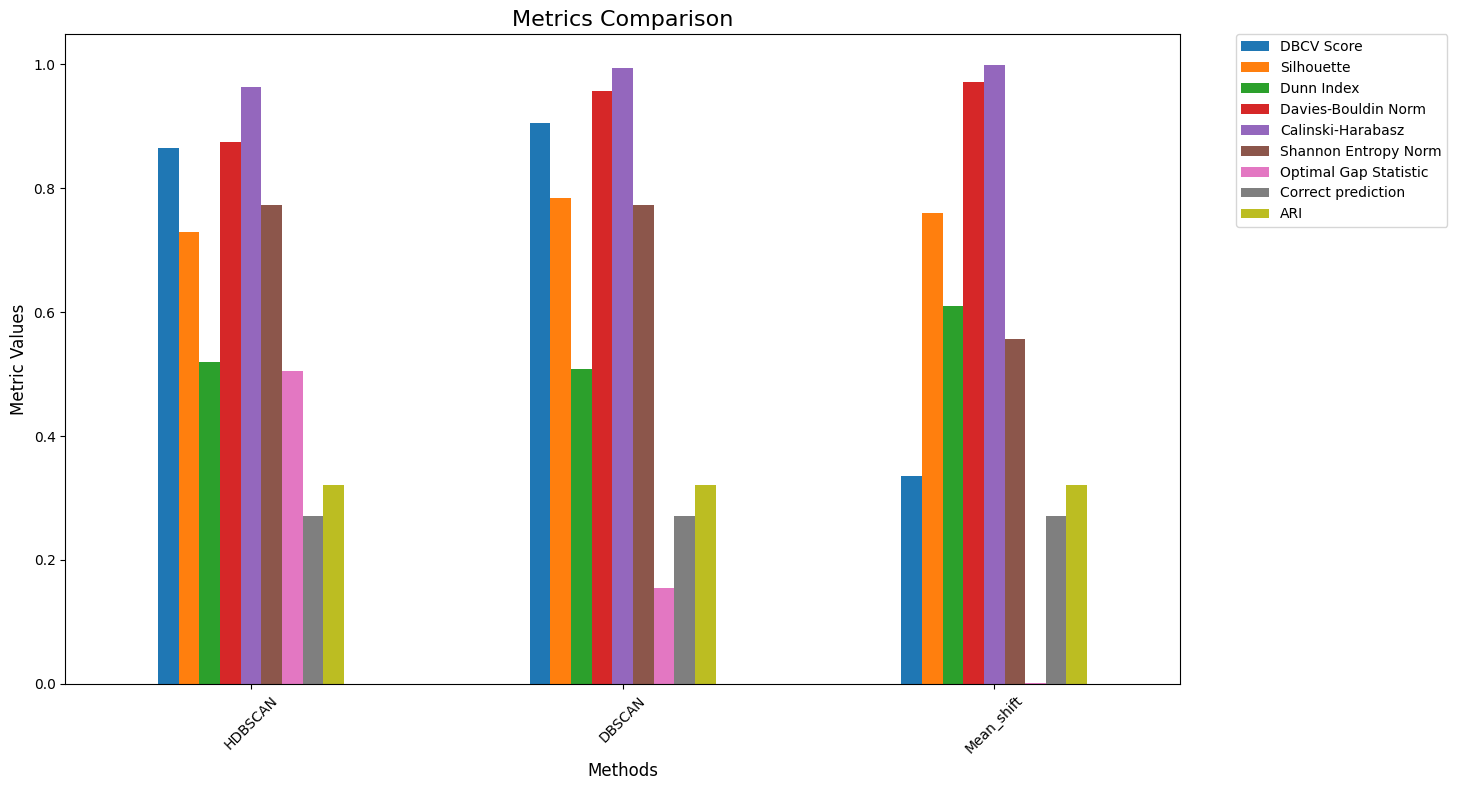

In [139]:
df_metrics_cardiac_arrest.set_index("Method", inplace=True)
plt.figure(figsize=(10, 8))
ax = df_metrics_cardiac_arrest.plot(kind='bar', figsize=(12, 8))
plt.title('Metrics Comparison', fontsize=16)
plt.xlabel('Methods', fontsize=12)
plt.ylabel('Metric Values', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Mostriamo il grafico
plt.show()